<a href="https://colab.research.google.com/github/kevinhaposan/Home-Credit-Scorecard-Model/blob/main/Kevin_Haposan_Aripratama_Home_Credit_Scorecard_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Home Credit Scorecard Model**

# **A. Import Dataset**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.stats.proportion as sp

import matplotlib.pyplot as plt
import seaborn as sns
import math

## **Application Train**

In [ ]:
df_app_train = pd.read_csv('application_train.csv')
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_app_train_target = df_app_train.groupby(['TARGET']).size().reset_index(name = 'COUNT')
df_app_train_target

,TARGET,COUNT
0,0,282686
1,1,24825


**Check for duplicate data**

In [ ]:
print(f"Total duplicated data:", df_app_train.duplicated().sum())
print(f"Total duplicated data in subset SK_ID_CURR:", df_app_train.duplicated(subset=['SK_ID_CURR']).sum())

Total duplicated data: 0
Total duplicated data in subset SK_ID_CURR: 0


**Check for null values**

In [ ]:
null_app_train = df_app_train.isnull().sum() * 100 / df_app_train.shape[0]
null_app_train = null_app_train[null_app_train > 15]
null_app_train

OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53

In [ ]:
df_app_train = df_app_train.drop(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], axis=1)

In [ ]:
null_app_train1 = df_app_train.isna().sum() * 100 / df_app_train.shape[0]
null_app_train1 = null_app_train1[null_app_train1 > 0]
null_app_train1

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [ ]:
# Identifying columns with None values
df_app_train_none = df_app_train.columns[df_app_train.isna().any()].tolist()

# Filter the DataFrame to display only the columns with None values
df_app_train_filtered = df_app_train[df_app_train_none]

In [ ]:
df_app_train_filtered.head()

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,NaN,Laborers,1.0,0.083037,0.262949,0.139376,0.0247,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,NaN,Core staff,2.0,0.311267,0.622246,NaN,0.0959,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,26.0,Laborers,1.0,NaN,0.555912,0.729567,NaN,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.650442,NaN,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,NaN,Core staff,1.0,NaN,0.322738,NaN,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_app_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AMT_ANNUITY                   307499 non-null  float64
 1   AMT_GOODS_PRICE               307233 non-null  float64
 2   NAME_TYPE_SUITE               306219 non-null  object 
 3   OWN_CAR_AGE                   104582 non-null  float64
 4   OCCUPATION_TYPE               211120 non-null  object 
 5   CNT_FAM_MEMBERS               307509 non-null  float64
 6   EXT_SOURCE_1                  134133 non-null  float64
 7   EXT_SOURCE_2                  306851 non-null  float64
 8   EXT_SOURCE_3                  246546 non-null  float64
 9   APARTMENTS_AVG                151450 non-null  float64
 10  BASEMENTAREA_AVG              127568 non-null  float64
 11  YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 12  YEARS_BUILD_AVG               103023 non-nul

In [ ]:
df_app_train['AMT_ANNUITY'] = df_app_train['AMT_ANNUITY'].fillna(df_app_train['AMT_ANNUITY'].mean())
df_app_train['AMT_GOODS_PRICE'] = df_app_train['AMT_GOODS_PRICE'].fillna(df_app_train['AMT_GOODS_PRICE'].mean())
df_app_train['NAME_TYPE_SUITE'] = df_app_train['NAME_TYPE_SUITE'].fillna(df_app_train['NAME_TYPE_SUITE'].mode()[0])
df_app_train['CNT_FAM_MEMBERS'] = df_app_train['CNT_FAM_MEMBERS'].fillna(round(df_app_train['CNT_FAM_MEMBERS'].mean()))
df_app_train['EXT_SOURCE_2'] = df_app_train['EXT_SOURCE_2'].fillna(df_app_train['EXT_SOURCE_2'].mean())
df_app_train['OBS_30_CNT_SOCIAL_CIRCLE'] = df_app_train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(round(df_app_train['OBS_30_CNT_SOCIAL_CIRCLE'].mean()))
df_app_train['DEF_30_CNT_SOCIAL_CIRCLE'] = df_app_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(round(df_app_train['DEF_30_CNT_SOCIAL_CIRCLE'].mean()))
df_app_train['OBS_60_CNT_SOCIAL_CIRCLE'] = df_app_train['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(round(df_app_train['OBS_60_CNT_SOCIAL_CIRCLE'].mean()))
df_app_train['DEF_60_CNT_SOCIAL_CIRCLE'] = df_app_train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(round(df_app_train['DEF_60_CNT_SOCIAL_CIRCLE'].mean()))
df_app_train['DAYS_LAST_PHONE_CHANGE'] = df_app_train['DAYS_LAST_PHONE_CHANGE'].fillna(round(df_app_train['DAYS_LAST_PHONE_CHANGE'].mean()))
df_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(round(df_app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()))
df_app_train['AMT_REQ_CREDIT_BUREAU_DAY'] = df_app_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(round(df_app_train['AMT_REQ_CREDIT_BUREAU_DAY'].mean()))
df_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(round(df_app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()))
df_app_train['AMT_REQ_CREDIT_BUREAU_MON'] = df_app_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(round(df_app_train['AMT_REQ_CREDIT_BUREAU_MON'].mean()))
df_app_train['AMT_REQ_CREDIT_BUREAU_QRT'] = df_app_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(round(df_app_train['AMT_REQ_CREDIT_BUREAU_QRT'].mean()))
df_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'] = df_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(round(df_app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()))

In [ ]:
df_app_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [ ]:
df_app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.913480
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.738864
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**Check for inconsistent data**

In [ ]:
# Select columns with dtype 'int', 'float64', and object
nums_app = df_app_train.select_dtypes(include=['int', 'float64'])
cats_app = df_app_train.select_dtypes(include=['object'])

nums_app_col = nums_app.columns
cats_app_col = cats_app.columns

print(f"Columns with type int and float64:", nums_app_col)
print(f"Columns with type object:", cats_app_col)

Columns with type int and float64: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)
Columns with type object: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [ ]:
for column in df_app_train.columns:
    if column != 'AMT_INCOME_TOTAL':
        print(pd.unique(df_app_train[column]))

[100002 100003 100004 ... 456253 456254 456255]
[1 0]
['Cash loans' 'Revolving loans']
['M' 'F' 'XNA']
['N' 'Y']
['Y' 'N']
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
[0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.018634
 0.019689 0.0228   0.015221 0.031329 0.016612 0.

In [ ]:
df_app_train = df_app_train.query("CODE_GENDER != 'XNA'")

In [ ]:
for column in df_app_train.columns:
    if column != 'AMT_INCOME_TOTAL':
        print(pd.unique(df_app_train[column]))

[100002 100003 100004 ... 456253 456254 456255]
[1 0]
['Cash loans' 'Revolving loans']
['M' 'F']
['N' 'Y']
['Y' 'N']
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
[0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.018634
 0.019689 0.0228   0.015221 0.031329 0.016612 0.010006

In [ ]:
df_app_train_final_null = df_app_train.isnull().sum() * 100 / df_app_train.shape[0]
df_app_train_final_null = df_app_train_final_null[df_app_train_final_null > 0]
df_app_train_final_null

OWN_CAR_AGE                     65.991018
OCCUPATION_TYPE                 31.345303
EXT_SOURCE_1                    56.381156
EXT_SOURCE_3                    19.825565
APARTMENTS_AVG                  50.750064
BASEMENTAREA_AVG                58.516391
YEARS_BEGINEXPLUATATION_AVG     48.781329
YEARS_BUILD_AVG                 66.497998
COMMONAREA_AVG                  69.872231
ELEVATORS_AVG                   53.296348
ENTRANCES_AVG                   50.349098
FLOORSMAX_AVG                   49.761144
FLOORSMIN_AVG                   67.848862
LANDAREA_AVG                    59.376860
LIVINGAPARTMENTS_AVG            68.355192
LIVINGAREA_AVG                  50.193654
NONLIVINGAPARTMENTS_AVG         69.433216
NONLIVINGAREA_AVG               55.179232
APARTMENTS_MODE                 50.750064
BASEMENTAREA_MODE               58.516391
YEARS_BEGINEXPLUATATION_MODE    48.781329
YEARS_BUILD_MODE                66.497998
COMMONAREA_MODE                 69.872231
ELEVATORS_MODE                  53

This table is clear from null value

## **Application Test**

In [ ]:
df_app_test = pd.read_csv('application_test.csv')
df_app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## **Bureau**

In [ ]:
df_bureau = pd.read_csv('bureau.csv')
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
print(f"Total duplicated data:", df_bureau.duplicated().sum())
print(f"Total duplicated data subset SK_ID_BUREAU:", df_bureau.duplicated(subset=['SK_ID_BUREAU']).sum())

Total duplicated data: 0
Total duplicated data subset SK_ID_BUREAU: 0


In [ ]:
df_bureau.isnull().sum() * 100 / df_bureau.shape[0]

SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
AMT_ANNUITY               71.473490
dtype: float64

In [ ]:
df_bureau = df_bureau.drop(['DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY'], axis=1)

In [ ]:
df_bureau['DAYS_CREDIT_ENDDATE'] = df_bureau['DAYS_CREDIT_ENDDATE'].fillna(round(df_bureau['DAYS_CREDIT_ENDDATE'].mean()))
df_bureau['AMT_CREDIT_SUM'] = df_bureau['AMT_CREDIT_SUM'].fillna(round(df_bureau['AMT_CREDIT_SUM'].mean()))

In [ ]:
df_bureau.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
dtype: int64

In [ ]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   CNT_CREDIT_PROLONG      int64  
 8   AMT_CREDIT_SUM          float64
 9   AMT_CREDIT_SUM_OVERDUE  float64
 10  CREDIT_TYPE             object 
 11  DAYS_CREDIT_UPDATE      int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 157.1+ MB


In [ ]:
df_bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105470e+02,6.410406e-03,3.549946e+05,3.791276e+01,-5.937483e+02
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.838222e+03,9.622391e-02,1.149807e+06,5.937650e+03,7.207473e+02
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.194700e+04
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.074000e+03,0.000000e+00,5.130000e+04,0.000000e+00,-9.080000e+02
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-2.370000e+02,0.000000e+00,1.255230e+05,0.000000e+00,-3.950000e+02
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,5.110000e+02,0.000000e+00,3.150000e+05,0.000000e+00,-3.300000e+01
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,9.000000e+00,5.850000e+08,3.756681e+06,3.720000e+02


In [ ]:
df_bureau_final_null = df_bureau.isnull().sum() * 100 / df_bureau.shape[0]
df_bureau_final_null = df_bureau_final_null[df_bureau_final_null > 0]
df_bureau_final_null

Series([], dtype: float64)

## **Bureau Balance**

In [ ]:
df_bureau_balance = pd.read_csv('bureau_balance.csv')
df_bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
print(f"Jumlah data duplikat secara keseluruhan:", df_bureau_balance.duplicated().sum())

Jumlah data duplikat secara keseluruhan: 0


In [ ]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
df_bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [ ]:
df_bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


## **Credit Card Balance**

In [ ]:
df_credit_card_balance = pd.read_csv('credit_card_balance.csv')
df_credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
print(f"Jumlah data duplikat secara keseluruhan:", df_credit_card_balance.duplicated().sum())
print(f"Jumlah data duplikat dengan subset SK_ID_PREV:", df_credit_card_balance.duplicated(subset=['SK_ID_PREV']).sum())
print(f"Jumlah data duplikat dengan subset SK_ID_CURR:", df_credit_card_balance.duplicated(subset=['SK_ID_CURR']).sum())

Jumlah data duplikat secara keseluruhan: 0
Jumlah data duplikat dengan subset SK_ID_PREV: 3736005
Jumlah data duplikat dengan subset SK_ID_CURR: 3736754


In [ ]:
df_credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
df_credit_card_balance.isnull().sum() * 100 / df_credit_card_balance.shape[0]

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
MONTHS_BALANCE                 0.000000
AMT_BALANCE                    0.000000
AMT_CREDIT_LIMIT_ACTUAL        0.000000
AMT_DRAWINGS_ATM_CURRENT      19.524872
AMT_DRAWINGS_CURRENT           0.000000
AMT_DRAWINGS_OTHER_CURRENT    19.524872
AMT_DRAWINGS_POS_CURRENT      19.524872
AMT_INST_MIN_REGULARITY        7.948208
AMT_PAYMENT_CURRENT           19.998063
AMT_PAYMENT_TOTAL_CURRENT      0.000000
AMT_RECEIVABLE_PRINCIPAL       0.000000
AMT_RECIVABLE                  0.000000
AMT_TOTAL_RECEIVABLE           0.000000
CNT_DRAWINGS_ATM_CURRENT      19.524872
CNT_DRAWINGS_CURRENT           0.000000
CNT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_POS_CURRENT      19.524872
CNT_INSTALMENT_MATURE_CUM      7.948208
NAME_CONTRACT_STATUS           0.000000
SK_DPD                         0.000000
SK_DPD_DEF                     0.000000
dtype: float64

In [ ]:
df_credit_card_balance = df_credit_card_balance.drop(['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT'], axis = 1)

In [ ]:
df_credit_card_balance['AMT_INST_MIN_REGULARITY'] = df_credit_card_balance['AMT_INST_MIN_REGULARITY'].fillna(round(df_credit_card_balance['AMT_INST_MIN_REGULARITY'].mean()))
df_credit_card_balance['CNT_INSTALMENT_MATURE_CUM'] = df_credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].fillna(round(df_credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].mean()))

In [ ]:
df_credit_card_balance.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
AMT_BALANCE                  0
AMT_CREDIT_LIMIT_ACTUAL      0
AMT_DRAWINGS_CURRENT         0
AMT_INST_MIN_REGULARITY      0
AMT_PAYMENT_TOTAL_CURRENT    0
AMT_RECEIVABLE_PRINCIPAL     0
AMT_RECIVABLE                0
AMT_TOTAL_RECEIVABLE         0
CNT_DRAWINGS_CURRENT         0
CNT_INSTALMENT_MATURE_CUM    0
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [ ]:
df_credit_card_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,7.433388e+03,3.540188e+03,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,7.031439e-01,2.083899e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,3.384608e+04,5.372991e+03,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,3.190347e+00,1.923819e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.211620e+03,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,5.625000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.287098e+06,2.028820e+05,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


## **Installments Payment**

In [ ]:
df_installments_payments = pd.read_csv('installments_payments.csv')
df_installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
print(f"Jumlah data duplikat secara keseluruhan:", df_installments_payments.duplicated().sum())
print(f"Jumlah data duplikat dengan subset SK_ID_PREV:", df_installments_payments.duplicated(subset=['SK_ID_PREV']).sum())
print(f"Jumlah data duplikat dengan subset SK_ID_CURR:", df_installments_payments.duplicated(subset=['SK_ID_CURR']).sum())

Jumlah data duplikat secara keseluruhan: 0
Jumlah data duplikat dengan subset SK_ID_PREV: 12607649
Jumlah data duplikat dengan subset SK_ID_CURR: 13265814


In [ ]:
df_installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
df_installments_payments.isnull().sum() * 100 / df_installments_payments.shape[0]

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.021352
AMT_INSTALMENT            0.000000
AMT_PAYMENT               0.021352
dtype: float64

In [ ]:
df_installments_payments['DAYS_ENTRY_PAYMENT'] = df_installments_payments['DAYS_ENTRY_PAYMENT'].fillna(round(df_installments_payments['DAYS_ENTRY_PAYMENT'].mean()))
df_installments_payments['AMT_PAYMENT'] = df_installments_payments['AMT_PAYMENT'].fillna(round(df_installments_payments['AMT_PAYMENT'].mean()))

In [ ]:
df_installments_payments.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

In [ ]:
df_installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005004e+02,5.057025e+04,5.472994e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.399300e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.128755e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.611792e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


## **Pos Cash Balance**

In [ ]:
df_pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')
df_pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
print(f"Jumlah data duplikat secara keseluruhan:", df_pos_cash_balance.duplicated().sum())
print(f"Jumlah data duplikat dengan subset SK_ID_PREV:", df_pos_cash_balance.duplicated(subset=['SK_ID_PREV']).sum())
print(f"Jumlah data duplikat dengan subset SK_ID_CURR:", df_pos_cash_balance.duplicated(subset=['SK_ID_CURR']).sum())

Jumlah data duplikat secara keseluruhan: 0
Jumlah data duplikat dengan subset SK_ID_PREV: 9065033
Jumlah data duplikat dengan subset SK_ID_CURR: 9664106


In [ ]:
df_pos_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
df_pos_cash_balance.isnull().sum() * 100 / df_pos_cash_balance.shape[0]

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.260675
CNT_INSTALMENT_FUTURE    0.260835
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

In [ ]:
df_pos_cash_balance['CNT_INSTALMENT'] = df_pos_cash_balance['CNT_INSTALMENT'].fillna(round(df_pos_cash_balance['CNT_INSTALMENT'].mean()))
df_pos_cash_balance['CNT_INSTALMENT_FUTURE'] = df_pos_cash_balance['CNT_INSTALMENT_FUTURE'].fillna(round(df_pos_cash_balance['CNT_INSTALMENT_FUTURE'].mean()))

In [ ]:
df_pos_cash_balance.isnull().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64

In [ ]:
df_pos_cash_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,1.000136e+07,1.000136e+07,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708942e+01,1.048258e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.197941e+01,1.109459e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


## **Previous Application**

In [ ]:
df_previous_application = pd.read_csv('previous_application.csv')
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"Jumlah data duplikat secara keseluruhan:", df_previous_application.duplicated().sum())
print(f"Jumlah data duplikat dengan subset SK_ID_PREV:", df_previous_application.duplicated(subset=['SK_ID_PREV']).sum())
print(f"Jumlah data duplikat dengan subset SK_ID_CURR:", df_previous_application.duplicated(subset=['SK_ID_CURR']).sum())

Jumlah data duplikat secara keseluruhan: 0
Jumlah data duplikat dengan subset SK_ID_PREV: 0
Jumlah data duplikat dengan subset SK_ID_CURR: 1331357


In [ ]:
df_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
df_previous_application.isnull().sum() * 100 / df_previous_application.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [ ]:
df_previous_application = df_previous_application.drop(['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], axis = 1)

In [ ]:
df_previous_application['PRODUCT_COMBINATION'] = df_previous_application['PRODUCT_COMBINATION'].fillna(df_previous_application['PRODUCT_COMBINATION'].mode()[0])
df_previous_application['AMT_CREDIT'] = df_previous_application['AMT_CREDIT'].fillna(df_previous_application['AMT_CREDIT'].mean())

In [ ]:
df_previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [ ]:
df_previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.752339e+05,1.961140e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02
std,5.325980e+05,1.028148e+05,2.927798e+05,3.185745e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00
25%,1.461857e+06,1.893290e+05,1.872000e+04,2.416050e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00
50%,1.923110e+06,2.787145e+05,7.104600e+04,8.054100e+04,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00
75%,2.384280e+06,3.675140e+05,1.803600e+05,2.164185e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01
max,2.845382e+06,4.562550e+05,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06


# **B. Join Data**

## **Application Train - Bureau**

In [ ]:
df_train = pd.merge(df_app_train, df_bureau, on='SK_ID_CURR')

The dataset merging is only performed between the 'Application Train' and 'Bureau' tables due to RAM limitations.

In [ ]:
df_train_null = df_train.isnull().sum() * 100 / df_train.shape[0]
df_train_null = df_train_null[df_train_null > 0]
df_train_null

OWN_CAR_AGE                     63.724543
OCCUPATION_TYPE                 31.096554
EXT_SOURCE_1                    53.456890
EXT_SOURCE_3                     3.065261
APARTMENTS_AVG                  48.265020
BASEMENTAREA_AVG                56.176623
YEARS_BEGINEXPLUATATION_AVG     46.209251
YEARS_BUILD_AVG                 64.570314
COMMONAREA_AVG                  68.087431
ELEVATORS_AVG                   50.821987
ENTRANCES_AVG                   47.764710
FLOORSMAX_AVG                   47.194107
FLOORSMIN_AVG                   66.037053
LANDAREA_AVG                    57.053787
LIVINGAPARTMENTS_AVG            66.531494
LIVINGAREA_AVG                  47.633610
NONLIVINGAPARTMENTS_AVG         67.633938
NONLIVINGAREA_AVG               52.724339
APARTMENTS_MODE                 48.265020
BASEMENTAREA_MODE               56.176623
YEARS_BEGINEXPLUATATION_MODE    46.209251
YEARS_BUILD_MODE                64.570314
COMMONAREA_MODE                 68.087431
ELEVATORS_MODE                  50

In [ ]:
print(f"Total duplicated data:", df_train.duplicated().sum())
print(f"Total duplicated data in subset SK_ID_BUREAU:", df_train.duplicated(subset=['SK_ID_BUREAU']).sum())

Total duplicated data: 0
Total duplicated data in subset SK_ID_BUREAU: 0


# **C. Exploratory Data Analysis**

In [ ]:
df1 = df_train.copy()

In [ ]:
df1 = df1.drop(['SK_ID_CURR', 'SK_ID_BUREAU'], axis = 1)

In [ ]:
# Select columns with dtype 'int', 'float64', and object
nums = df1.select_dtypes(include=['int', 'float64'])
cats = df1.select_dtypes(include=['object'])

nums_col = nums.columns
cats_col = cats.columns

print(f"Columns with type int and float64:", nums_col)
print(f"Columns with type object:", cats_col)

Columns with type int and float64: Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE'],
      dtype='object', length=112)
Columns with type object: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'],
      

## **Numerical Univariate Statistics**

ValueError: num must be an integer with 1 <= num <= 70, not 73

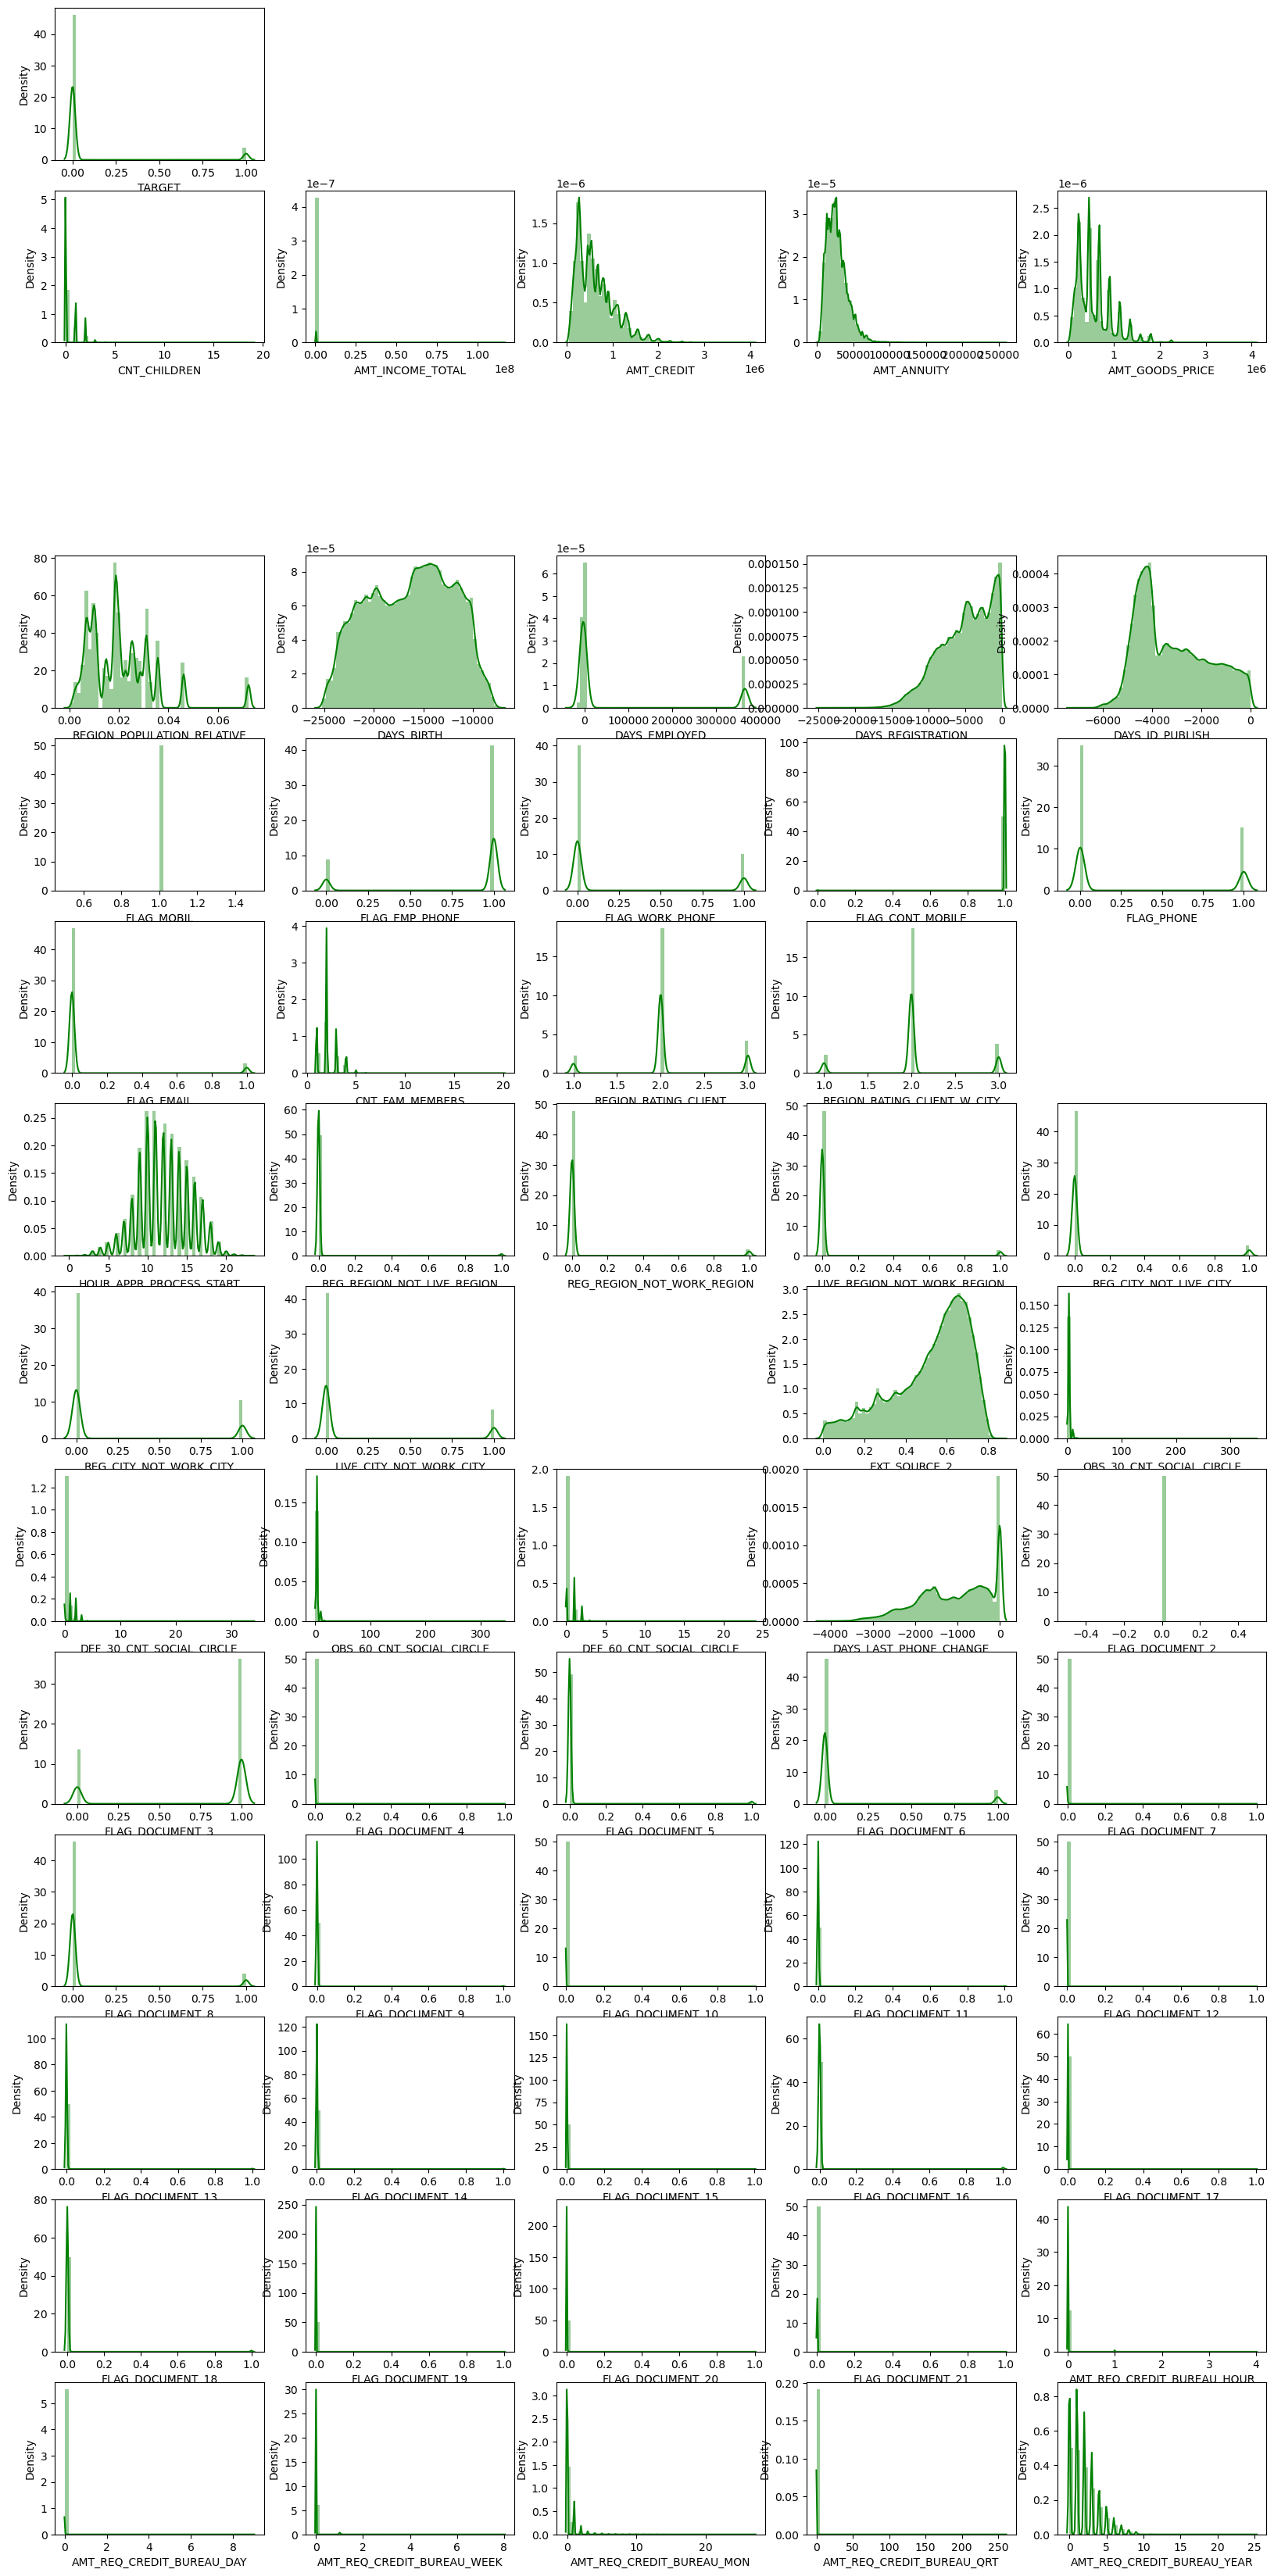

In [ ]:
# Menghitung jumlah kolom numerik
num_cols = sum(df1.dtypes.apply(lambda x: np.issubdtype(x, np.number)))

# Menghitung jumlah baris dan kolom subplot yang diperlukan
num_rows = (num_cols - 1) // 5 + 1
num_cols_subplot = min(num_cols, 5)

plt.figure(figsize=(20, num_rows * 3))  # Atur ukuran gambar

# Loop untuk menampilkan gambar untuk semua kolom numerik
for i, col in enumerate(df1.columns):
    if df1[col].dtype in ['int64', 'float64']:  # Periksa jika tipe data kolom adalah numerik
        plt.subplot(num_rows, num_cols_subplot, i + 1)  # Atur subplot sesuai dengan jumlah kolom
        sns.distplot(df1[col], color='green')  # Plot distribusi
        plt.xlabel(col)  # Atur label untuk sumbu x

plt.tight_layout()  # Atur tata letak subplot
plt.show()

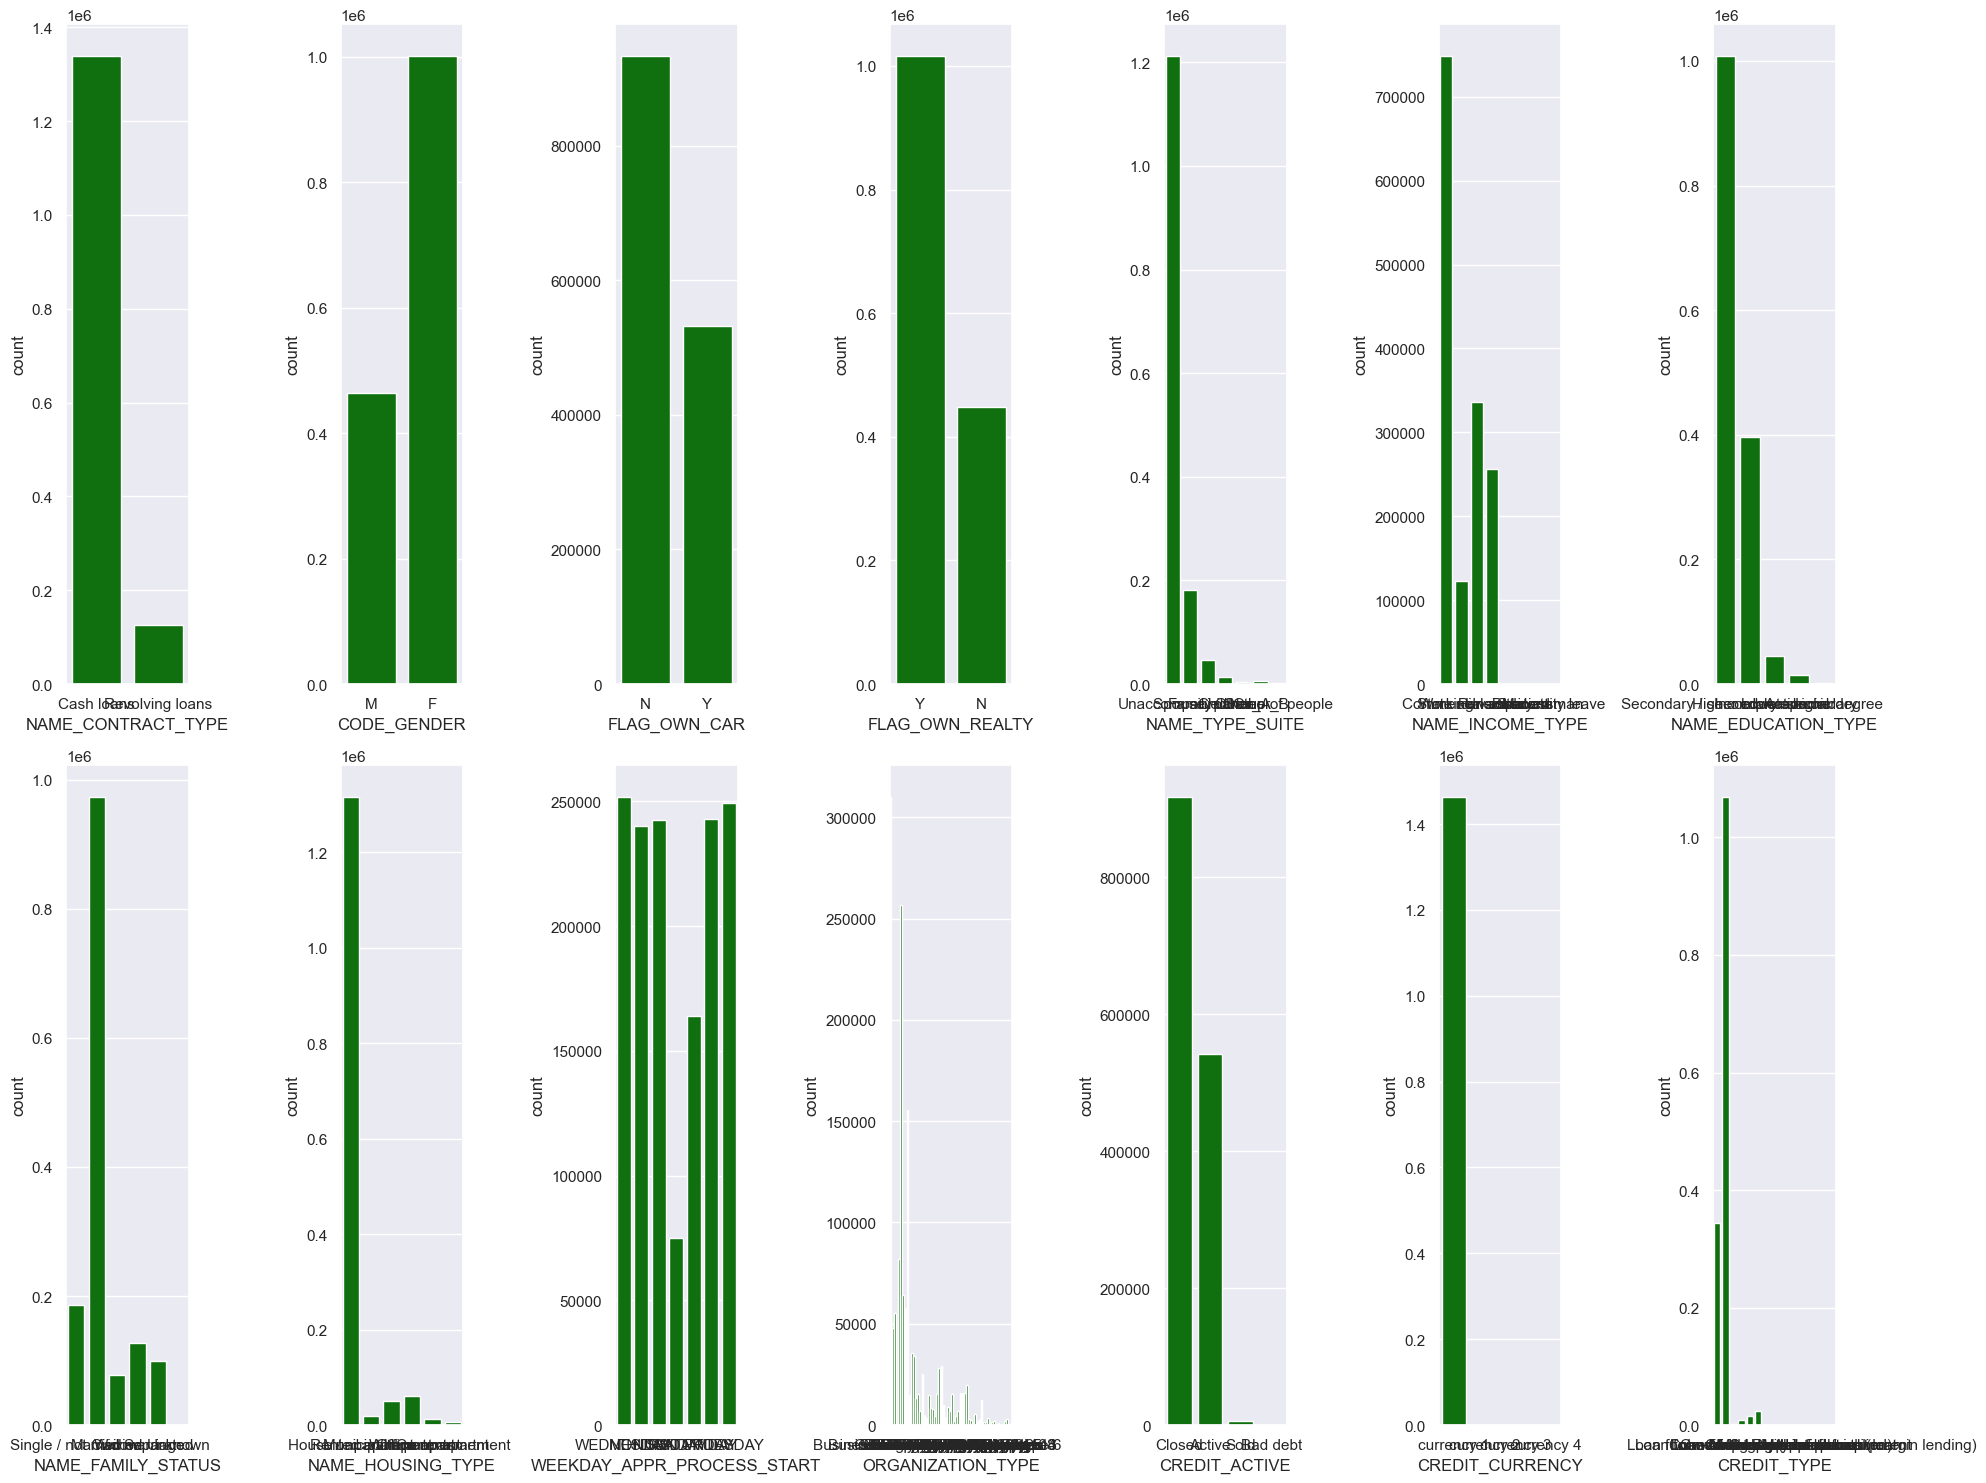

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})

for i, col in enumerate(cats_col):
    plt.subplot(2, 7, i+1)
    sns.countplot(x=df1[cats_col[i]], color='green')
    plt.tight_layout()

# **D. Data Preprocessing**

In [ ]:
df2 = df_train

## **Handle Missing Value**

It has been done during the dataset import.

## **Handle Duplicated Data**

It has been done during the dataset import.

## **Label Encoding**

In [ ]:
df2[cats_col].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1465291,1465291,1465291,1465291,1465291,1465291,1465291,1465291,1465291,1009636,1465291,1465291,489843,766542,757584,808078,1465291,1465291,1465291
unique,2,2,2,2,7,8,5,6,6,18,7,58,4,3,7,2,4,4,15
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No,Closed,currency 1,Consumer credit
freq,1339738,1001547,933723,1016674,1213111,749035,1008577,974144,1317159,253598,251907,310224,371214,753600,335480,796971,917714,1464060,1069587


- The 'Organization Type' column is dropped due to its high number of unique values
- Label encoding is performed using one-hot encoding.

In [ ]:
# ORGANIZATION_TYPE has many unique values and will therefore be dropped
df2 = df2.drop(['ORGANIZATION_TYPE'], axis = 1)

In [ ]:
cat1 = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

# Doing one-hot encoding on categorical columns
for cat in cat1:
    if df2[cat].dtype == 'object':
        nominal_encoded = pd.get_dummies(df2[cat], prefix=cat, dtype=int)
        df2 = pd.concat([df2, nominal_encoded], axis=1)

# Deleting the categorical columns that have been encoded
df2.drop(columns=cat1, inplace=True)

In [ ]:
df2.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'CREDIT_TYPE_Interbank credit',
       'CREDIT_TYPE_Loan for business development',
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)',
       'CREDIT_TYPE_Loan for the purchase of equipment',
       'CREDIT_TYPE_Loan for working capital replenishment',
       'CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Mobile operator loan',
       'CREDIT_TYPE_Mortgage', 'CREDIT_TYPE_Real estate loan',
       'CREDIT_TYPE_Unknown type of loan'],
      dtype='object', length=189)

## **Feature Extaction**

In [ ]:
df2['AGE'] = df2['DAYS_BIRTH'] / (-365)
df2['AGE'] = df2['AGE'].apply(math.floor)

In [ ]:
df2['TOTAL_FLAG_DOCUMENT'] = df2['FLAG_DOCUMENT_2'] + df2['FLAG_DOCUMENT_3'] + df2['FLAG_DOCUMENT_4'] + df2['FLAG_DOCUMENT_5'] + df2['FLAG_DOCUMENT_6'] + df2['FLAG_DOCUMENT_7'] + df2['FLAG_DOCUMENT_8'] + df2['FLAG_DOCUMENT_9'] + df2['FLAG_DOCUMENT_10'] + df2['FLAG_DOCUMENT_11'] + df2['FLAG_DOCUMENT_12'] + df2['FLAG_DOCUMENT_13'] + df2['FLAG_DOCUMENT_14'] + df2['FLAG_DOCUMENT_15'] + df2['FLAG_DOCUMENT_16'] + df2['FLAG_DOCUMENT_17'] + df2['FLAG_DOCUMENT_18'] + df2['FLAG_DOCUMENT_19'] + df2['FLAG_DOCUMENT_20'] + df2['FLAG_DOCUMENT_21']

In [ ]:
cats_2 = df2.select_dtypes(include=['object']).column
cats_2

AttributeError: 'DataFrame' object has no attribute 'column'

## **Data Train, Data Validasi, dan Data Test Split**

In [ ]:
df = df2.copy()

In [ ]:
df = df.drop(['SK_ID_CURR', 'SK_ID_BUREAU'], axis = 1)

In [ ]:
df_null = df.isnull().sum() * 100 / df.shape[0]
df_null = df_null[df_null > 0]
df_null

OWN_CAR_AGE                     63.724543
OCCUPATION_TYPE                 31.096554
EXT_SOURCE_1                    53.456890
EXT_SOURCE_3                     3.065261
APARTMENTS_AVG                  48.265020
BASEMENTAREA_AVG                56.176623
YEARS_BEGINEXPLUATATION_AVG     46.209251
YEARS_BUILD_AVG                 64.570314
COMMONAREA_AVG                  68.087431
ELEVATORS_AVG                   50.821987
ENTRANCES_AVG                   47.764710
FLOORSMAX_AVG                   47.194107
FLOORSMIN_AVG                   66.037053
LANDAREA_AVG                    57.053787
LIVINGAPARTMENTS_AVG            66.531494
LIVINGAREA_AVG                  47.633610
NONLIVINGAPARTMENTS_AVG         67.633938
NONLIVINGAREA_AVG               52.724339
APARTMENTS_MODE                 48.265020
BASEMENTAREA_MODE               56.176623
YEARS_BEGINEXPLUATATION_MODE    46.209251
YEARS_BUILD_MODE                64.570314
COMMONAREA_MODE                 68.087431
ELEVATORS_MODE                  50

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['TARGET'],axis=1,inplace=False)
y = df['TARGET']

Xmodel, Xtest, ymodel, ytest = train_test_split(X, y, test_size=0.10, random_state=123, stratify = y) #model for building the machine learning model

In [ ]:
Xmodel.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,AGE,TOTAL_FLAG_DOCUMENT
712825,0,193500.0,167076.0,15322.5,135000.0,0.025164,-9440,-1670,-4211.0,-1769,...,0,0,0,0,0,0,0,0,25,1
1316827,1,175500.0,593010.0,19260.0,495000.0,0.006008,-9902,-129,-7486.0,-2585,...,0,0,0,0,0,0,0,0,27,1
573149,3,63000.0,226152.0,10089.0,162000.0,0.031329,-18155,-817,-3509.0,-1713,...,0,0,0,0,0,0,0,0,49,1
759178,0,450000.0,1622691.0,44752.5,1354500.0,0.032561,-16875,-1489,-2233.0,-406,...,0,0,0,0,0,0,0,0,46,1
844743,0,81000.0,157914.0,8946.0,139500.0,0.019689,-23582,365243,-11192.0,-4751,...,0,0,0,0,0,0,0,0,64,1


In [ ]:
ymodel.value_counts()

TARGET
0    1215693
1     103068
Name: count, dtype: int64

In [ ]:
ytest.value_counts()

TARGET
0    135078
1     11452
Name: count, dtype: int64

In [ ]:
X1 = Xmodel
y1 = ymodel

Xtrain, Xeval, ytrain, yeval = train_test_split (X1, y1, test_size = 0.2, random_state=123, stratify = y1)

In [ ]:
ytrain.value_counts()

TARGET
0    972554
1     82454
Name: count, dtype: int64

## **Handle Outlier**

## **Feature Transformation**

#### **Normalization**

In [ ]:
nor_col = ['DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'AGE', 'DAYS_CREDIT_ENDDATE']
features1 = nor_col
num_plots1 = len(features1)
num_cols1 = 4
num_rows1 = math.ceil(num_plots1 / num_cols1)

Before Normalization

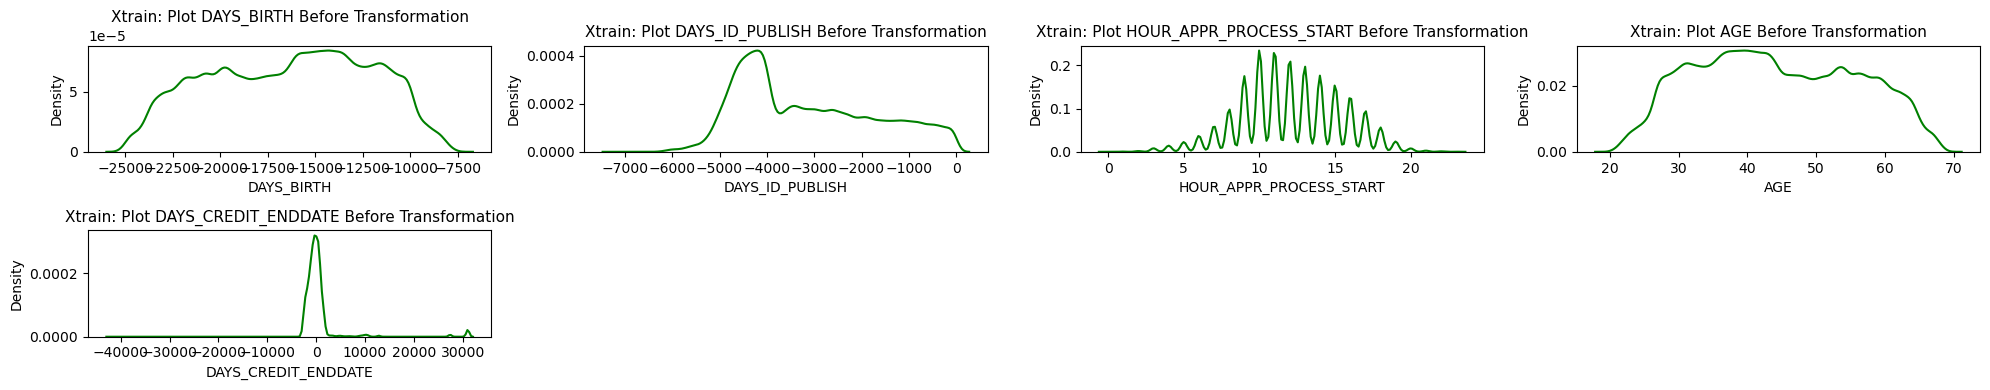

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots1):
    plt.subplot(num_rows1, num_cols1, i+1)
    sns.kdeplot(x=Xtrain[features1[i]], color='green')
    plt.xlabel(features1[i])
    plt.title(f'Xtrain: Plot {features1[i]} Before Transformation', size = 11)
plt.tight_layout()
plt.show()

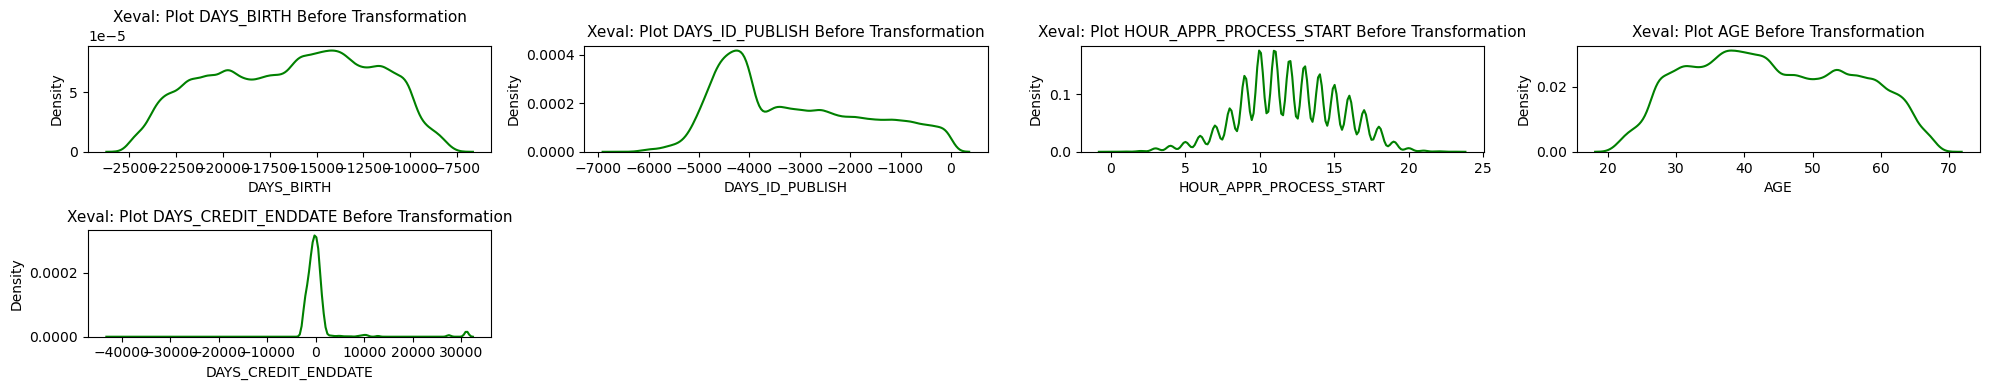

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots1):
    plt.subplot(num_rows1, num_cols1, i+1)
    sns.kdeplot(x=Xeval[features1[i]], color='green')
    plt.xlabel(features1[i])
    plt.title(f'Xeval: Plot {features1[i]} Before Transformation', size = 11)
plt.tight_layout()
plt.show()

In [ ]:
# Transforming the columns CreditScore, Balance, and EstimatedSalary features in the Xtrain and Xeval data.
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

for col in nor_col:
  Xtrain[[col]] = ms.fit_transform(Xtrain[[col]])
  Xeval[[col]] = ms.transform(Xeval[[col]])

Setelah Normalisasi

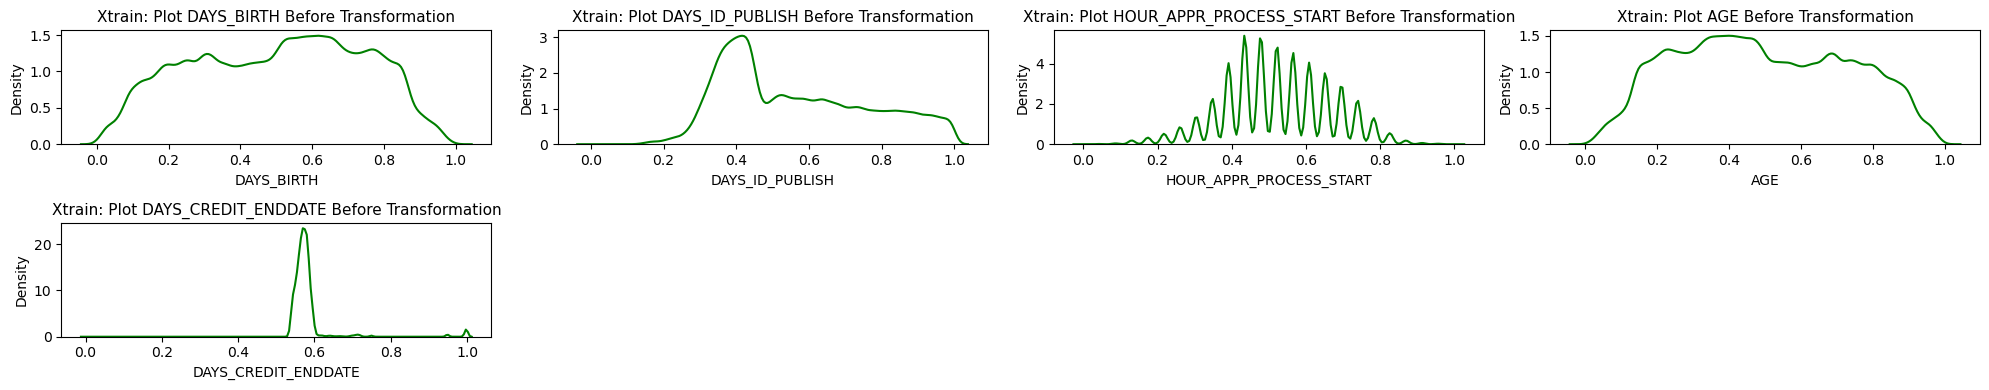

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots1):
    plt.subplot(num_rows1, num_cols1, i+1)
    sns.kdeplot(x=Xtrain[features1[i]], color='green')
    plt.xlabel(features1[i])
    plt.title(f'Xtrain: Plot {features1[i]} Before Transformation', size = 11)
plt.tight_layout()
plt.show()

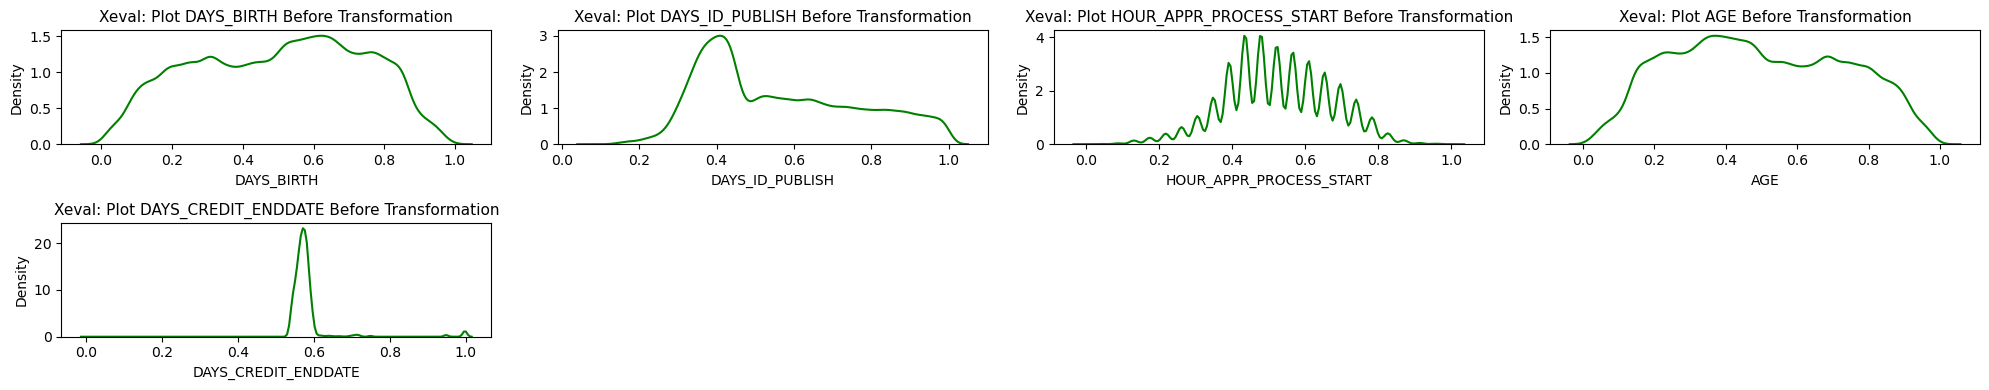

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots1):
    plt.subplot(num_rows1, num_cols1, i+1)
    sns.kdeplot(x=Xeval[features1[i]], color='green')
    plt.xlabel(features1[i])
    plt.title(f'Xeval: Plot {features1[i]} Before Transformation', size = 11)
plt.tight_layout()
plt.show()

#### **Logarithmic Transformation (for Right-Skewed Distribution)**

In [ ]:
log_col = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_YEAR']
features2 = log_col
num_plots2 = len(features2)
num_cols2 = 4
num_rows2 = math.ceil(num_plots2 / num_cols2)

Before Transformation

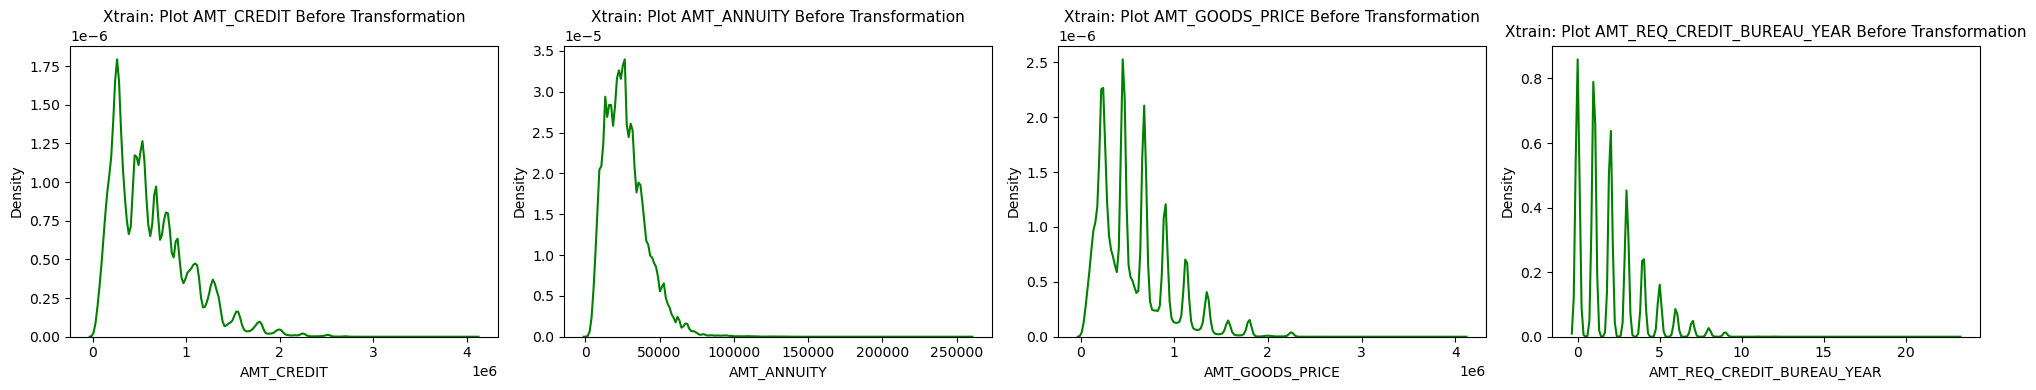

In [ ]:
plt.figure(figsize=(20, 4))

for i in range(num_plots2):
    plt.subplot(num_rows2, num_cols2, i+1)
    sns.kdeplot(x=Xtrain[features2[i]], color='green')
    plt.xlabel(features2[i])
    plt.title(f'Xtrain: Plot {features2[i]} Before Transformation', size = 11)
plt.tight_layout()
plt.show()

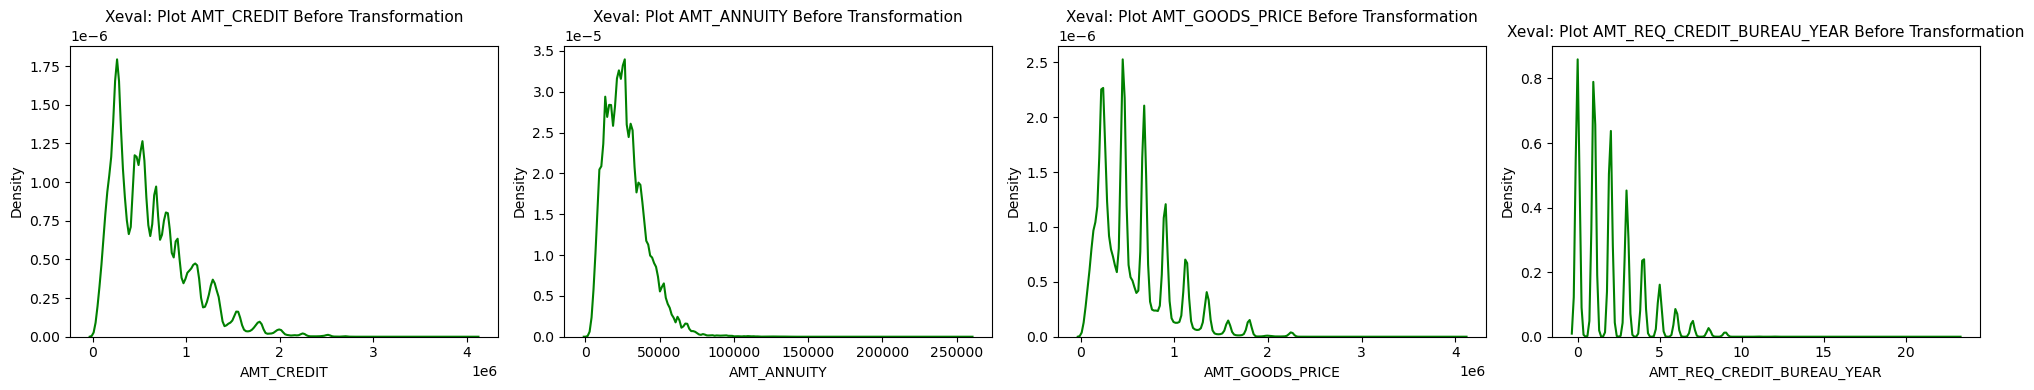

In [ ]:
plt.figure(figsize=(20, 4))

for i in range(num_plots2):
    plt.subplot(num_rows2, num_cols2, i+1)
    sns.kdeplot(x=Xtrain[features2[i]], color='green')
    plt.xlabel(features2[i])
    plt.title(f'Xeval: Plot {features2[i]} Before Transformation', size = 11)
plt.tight_layout()
plt.show()

In [ ]:
for col2 in log_col:
  Xtrain[[col2]] = (Xtrain[[col2]]).apply(np.log)
  Xeval[[col2]] = (Xeval[[col2]]).apply(np.log)

After Transformation

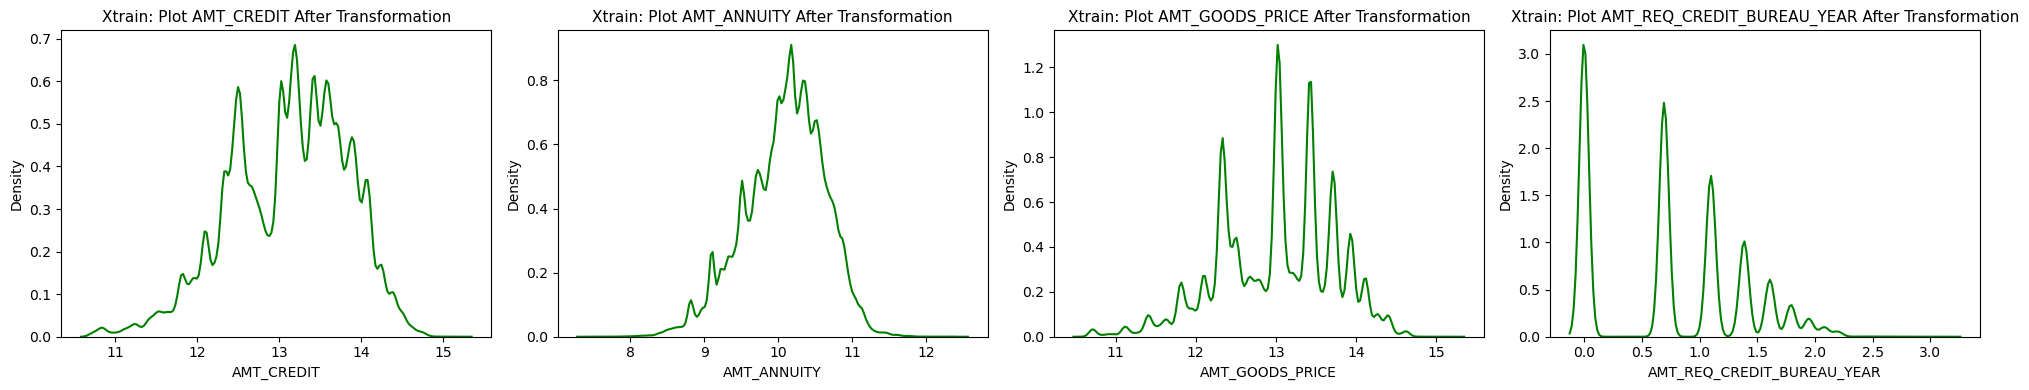

In [ ]:
plt.figure(figsize=(20, 4))

for i in range(num_plots2):
    plt.subplot(num_rows2, num_cols2, i+1)
    sns.kdeplot(x=Xtrain[features2[i]], color='green')
    plt.xlabel(features2[i])
    plt.title(f'Xtrain: Plot {features2[i]} After Transformation', size = 11)
plt.tight_layout()
plt.show()

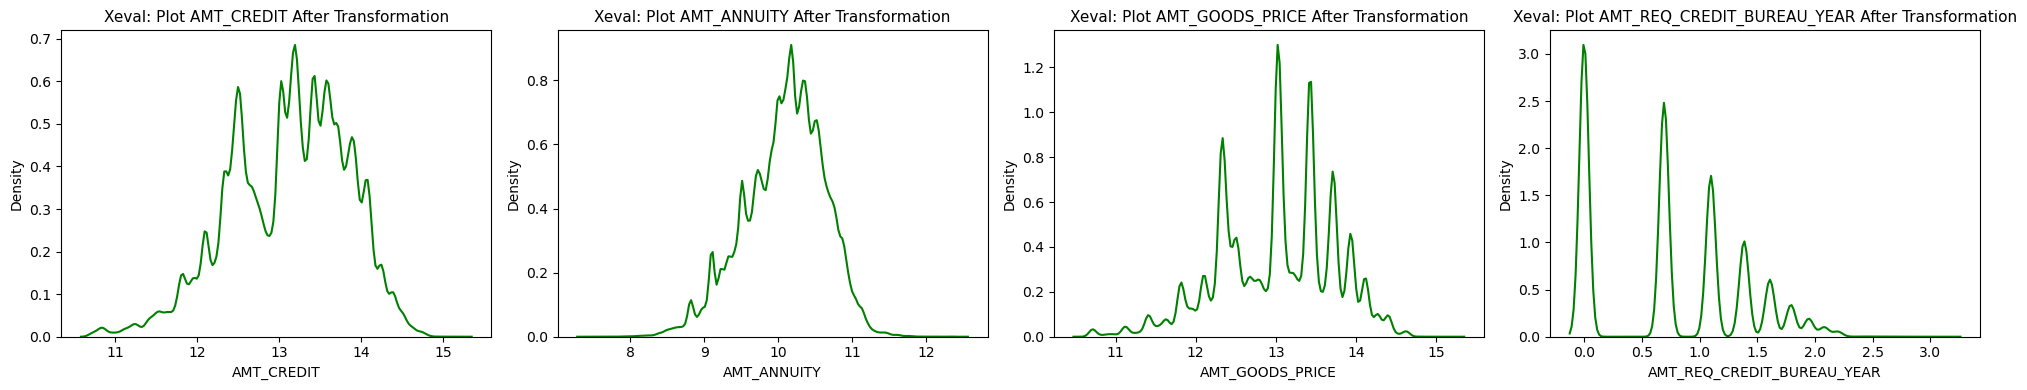

In [ ]:
plt.figure(figsize=(20, 4))

for i in range(num_plots2):
    plt.subplot(num_rows2, num_cols2, i+1)
    sns.kdeplot(x=Xtrain[features2[i]], color='green')
    plt.xlabel(features2[i])
    plt.title(f'Xeval: Plot {features2[i]} After Transformation', size = 11)
plt.tight_layout()
plt.show()

#### **Yeo-Johnson (for Left-Skewed Distribution)**

In [ ]:
trans_col = ['DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']
features3 = trans_col
num_plots3 = len(features3)
num_cols3 = 4
num_rows3 = math.ceil(num_plots3 / num_cols3)

Sebelum Transformasi

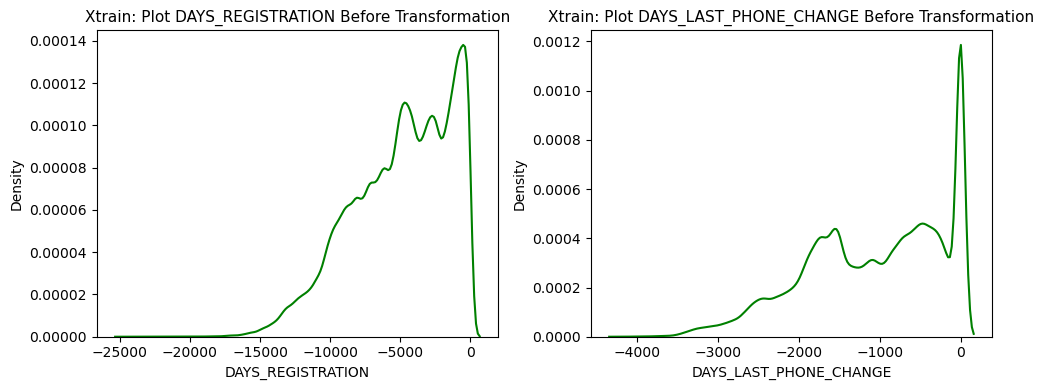

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots3):
    plt.subplot(num_rows3, num_cols3, i+1)
    sns.kdeplot(x=Xtrain[features3[i]], color='green')
    plt.xlabel(features3[i])
    plt.title(f'Xtrain: Plot {features3[i]} Before Transformation', size = 11)
plt.tight_layout()
plt.show()

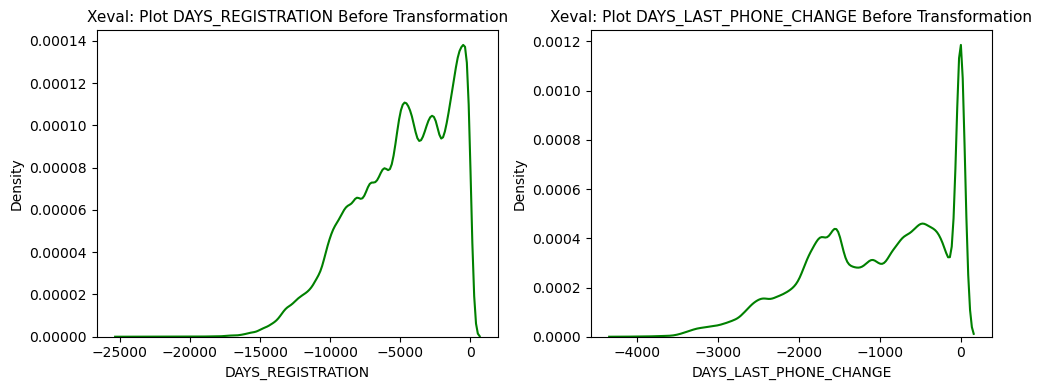

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots3):
    plt.subplot(num_rows3, num_cols3, i+1)
    sns.kdeplot(x=Xtrain[features3[i]], color='green')
    plt.xlabel(features3[i])
    plt.title(f'Xeval: Plot {features3[i]} Before Transformation', size = 11)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import yeojohnson

for col3 in trans_col:
    transformed_data1, _ = yeojohnson(Xtrain[col3] + 1)
    Xtrain[col3] = transformed_data1
    transformed_data2, _ = yeojohnson(Xeval[col3] + 1)
    Xeval[col3] = transformed_data2

Setelah Transformasi

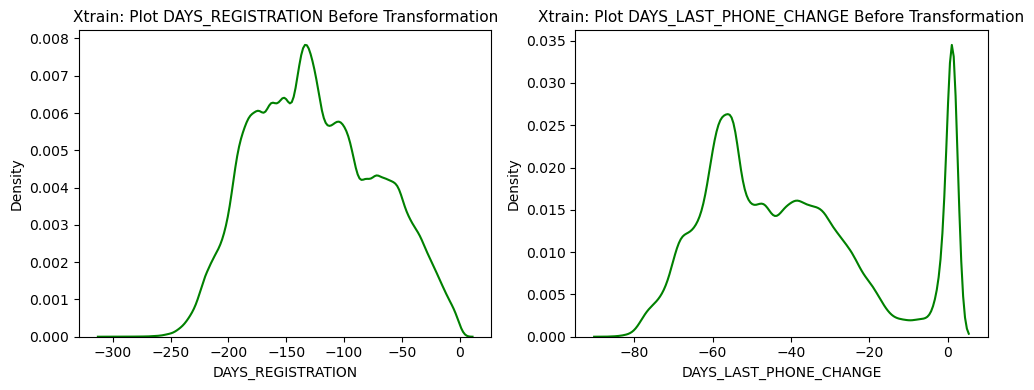

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots3):
    plt.subplot(num_rows3, num_cols3, i+1)
    sns.kdeplot(x=Xtrain[features3[i]], color='green')
    plt.xlabel(features3[i])
    plt.title(f'Xtrain: Plot {features3[i]} Before Transformation', size = 11)
plt.tight_layout()
plt.show()

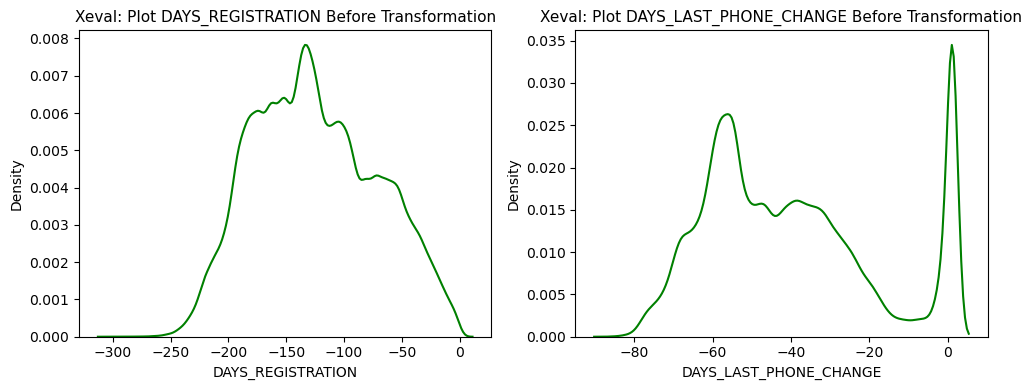

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots3):
    plt.subplot(num_rows3, num_cols3, i+1)
    sns.kdeplot(x=Xtrain[features3[i]], color='green')
    plt.xlabel(features3[i])
    plt.title(f'Xeval: Plot {features3[i]} Before Transformation', size = 11)
plt.tight_layout()
plt.show()

## **Handle Class Imbalance**

In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055008 entries, 220244 to 332771
Columns: 188 entries, CNT_CHILDREN to TOTAL_FLAG_DOCUMENT
dtypes: float64(72), int32(70), int64(41), object(5)
memory usage: 1.2+ GB


In [ ]:
ytrain.value_counts()

TARGET
0    972554
1     82454
Name: count, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=1, random_state=123)
Xtrain_under, ytrain_under = undersample.fit_resample(Xtrain, ytrain)

print('Random Undersampling')
print(pd.Series(ytrain_under).value_counts())

Random Undersampling
TARGET
0    82454
1    82454
Name: count, dtype: int64


In [ ]:
Xtrain_under.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164908 entries, 65886 to 329409
Columns: 188 entries, CNT_CHILDREN to TOTAL_FLAG_DOCUMENT
dtypes: float64(72), int32(70), int64(41), object(5)
memory usage: 193.8+ MB


In [ ]:
Xtrain_under.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,AGE,TOTAL_FLAG_DOCUMENT
65886,0,283500.0,13.888991,10.664597,13.805460,0.010032,0.456244,-7733,-138.562167,0.907600,...,0,0,0,0,0,0,0,0,0.530612,1
270182,2,292500.0,12.733260,9.437874,12.586220,0.072508,0.087060,-2962,-213.234824,0.350980,...,0,0,0,0,0,0,0,0,0.897959,1
795019,0,180000.0,13.710150,10.735396,13.710150,0.026392,0.676491,-2763,-65.576967,0.709462,...,0,0,0,0,0,0,0,0,0.326531,1
139351,1,225000.0,13.522856,10.775231,13.422468,0.020246,0.644252,-4435,-170.511077,0.526469,...,0,0,0,0,0,0,0,0,0.346939,1
319205,0,112500.0,13.697673,10.292366,13.422468,0.010966,0.353150,-6090,-199.401240,0.655829,...,0,0,0,0,0,0,0,0,0.632653,1


## **Feature Selection**

In [ ]:
Xtrain_under_fs = Xtrain_under.copy()
ytrain_under_fs = ytrain_under.copy()

In [ ]:
Xtrain_under_fs.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,AGE,TOTAL_FLAG_DOCUMENT
65886,0,283500.0,13.888991,10.664597,13.805460,0.010032,0.456244,-7733,-138.562167,0.907600,...,0,0,0,0,0,0,0,0,0.530612,1
270182,2,292500.0,12.733260,9.437874,12.586220,0.072508,0.087060,-2962,-213.234824,0.350980,...,0,0,0,0,0,0,0,0,0.897959,1
795019,0,180000.0,13.710150,10.735396,13.710150,0.026392,0.676491,-2763,-65.576967,0.709462,...,0,0,0,0,0,0,0,0,0.326531,1
139351,1,225000.0,13.522856,10.775231,13.422468,0.020246,0.644252,-4435,-170.511077,0.526469,...,0,0,0,0,0,0,0,0,0.346939,1
319205,0,112500.0,13.697673,10.292366,13.422468,0.010966,0.353150,-6090,-199.401240,0.655829,...,0,0,0,0,0,0,0,0,0.632653,1


In [ ]:
# Assuming Xtrain_under1 is your training data and ytrain_under1 is your target variable
Xtrain_under_fs = pd.DataFrame(np.maximum(0, Xtrain_under_fs))  # Convert Xtrain_under1 to a pandas DataFrame
ytrain_under_fs = pd.Series(ytrain_under_fs)  # Convert ytrain_under1 to a pandas Series

# Calculate the Pearson correlation coefficient between each feature and the target variable
correlation_matrix = Xtrain_under_fs.corrwith(ytrain_under_fs)

# Create a DataFrame to store the correlation coefficients
correlation_df = pd.DataFrame({'Feature': correlation_matrix.index, 'Correlation with Target': correlation_matrix.values})

# Print the correlation coefficients
print(correlation_df)

                              Feature  Correlation with Target
0                        CNT_CHILDREN                 0.026779
1                    AMT_INCOME_TOTAL                -0.000239
2                          AMT_CREDIT                -0.006560
3                         AMT_ANNUITY                 0.013764
4                     AMT_GOODS_PRICE                -0.024422
..                                ...                      ...
183              CREDIT_TYPE_Mortgage                -0.022803
184      CREDIT_TYPE_Real estate loan                -0.002463
185  CREDIT_TYPE_Unknown type of loan                -0.004022
186                               AGE                -0.123038
187               TOTAL_FLAG_DOCUMENT                 0.042175

[188 rows x 2 columns]


In [ ]:
sorted_df = correlation_df.sort_values('Correlation with Target', ascending=False)
top_30_features = sorted_df.head(30)
feature_names = top_30_features['Feature'].tolist()

print(feature_names)

['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_INCOME_TYPE_Working', 'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_3', 'CREDIT_ACTIVE_Active', 'CODE_GENDER_M', 'REG_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE_Cash loans', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'CREDIT_TYPE_Microloan', 'NAME_HOUSING_TYPE_With parents', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_CREDIT_ENDDATE', 'TOTAL_FLAG_DOCUMENT', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_WORK_PHONE', 'FLAG_OWN_CAR_N', 'CREDIT_TYPE_Credit card', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_FAMILY_STATUS_Single / not married', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS_Civil marriage', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE']


# **E. Data Visualization**

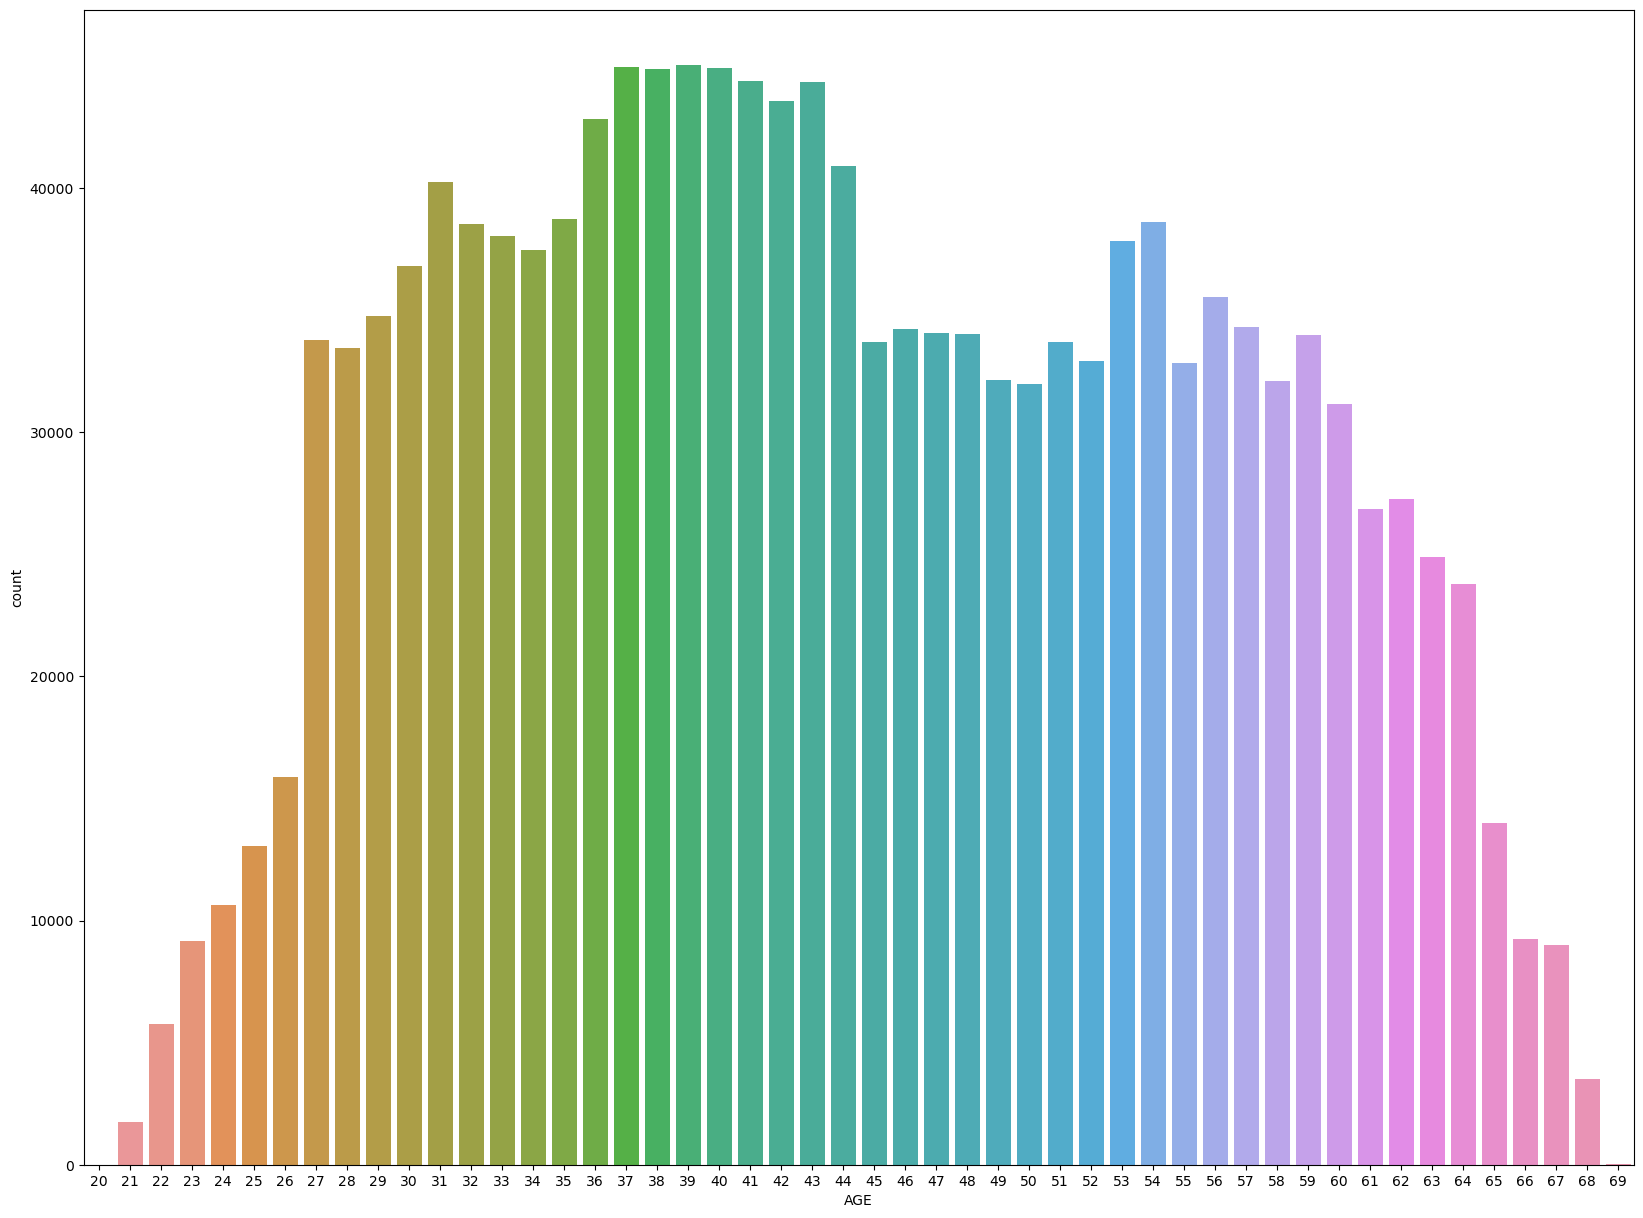

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(x='AGE', data=df2)
plt.show()

# **F. Modelling**

In [ ]:
Xtrain_under1 = Xtrain_under.copy()
Xeval1 = Xeval.copy()
ytrain_under1 = ytrain_under.copy()
yeval1 = yeval.copy()
Xtest1 = Xtest.copy()
ytest1 = ytest.copy()

In [ ]:
Xtrain_under1 = Xtrain_under1[['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_INCOME_TYPE_Working', 'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_3', 'CREDIT_ACTIVE_Active', 'CODE_GENDER_M', 'REG_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE_Cash loans', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'CREDIT_TYPE_Microloan', 'NAME_HOUSING_TYPE_With parents', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_CREDIT_ENDDATE', 'TOTAL_FLAG_DOCUMENT', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_WORK_PHONE', 'FLAG_OWN_CAR_N', 'CREDIT_TYPE_Credit card', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_FAMILY_STATUS_Single / not married', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS_Civil marriage', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE']]
Xeval1 = Xeval1[['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_INCOME_TYPE_Working', 'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_3', 'CREDIT_ACTIVE_Active', 'CODE_GENDER_M', 'REG_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE_Cash loans', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'CREDIT_TYPE_Microloan', 'NAME_HOUSING_TYPE_With parents', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_CREDIT_ENDDATE', 'TOTAL_FLAG_DOCUMENT', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_WORK_PHONE', 'FLAG_OWN_CAR_N', 'CREDIT_TYPE_Credit card', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_FAMILY_STATUS_Single / not married', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS_Civil marriage', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE']]

In [ ]:
Xtrain_under1.describe()

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Working,DAYS_ID_PUBLISH,FLAG_DOCUMENT_3,CREDIT_ACTIVE_Active,CODE_GENDER_M,REG_CITY_NOT_WORK_CITY,...,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,FLAG_OWN_CAR_N,CREDIT_TYPE_Credit card,NAME_HOUSING_TYPE_Rented apartment,NAME_FAMILY_STATUS_Single / not married,CNT_CHILDREN,NAME_FAMILY_STATUS_Civil marriage,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE
count,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000,...,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000,164908.000000
mean,0.526096,2.096145,2.115076,0.720474,0.546620,0.575210,0.753032,0.402127,0.347679,0.235028,...,0.114294,0.211075,0.652697,0.248902,0.015566,0.132826,0.442932,0.094113,2.194842,1.502383
std,0.233897,0.494144,0.499505,0.448767,0.497823,0.204813,0.431249,0.490329,0.476235,0.424018,...,0.391423,0.408073,0.476114,0.432378,0.123790,0.339387,0.738888,0.291987,0.916782,2.514002
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.089760,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.334237,2.000000,2.000000,0.000000,0.000000,0.402112,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.549232,2.000000,2.000000,1.000000,1.000000,0.536474,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,0.717649,2.000000,2.000000,1.000000,1.000000,0.741281,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000
max,0.989442,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,13.000000,348.000000


In [ ]:
Xeval1.describe()

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Working,DAYS_ID_PUBLISH,FLAG_DOCUMENT_3,CREDIT_ACTIVE_Active,CODE_GENDER_M,REG_CITY_NOT_WORK_CITY,...,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,FLAG_OWN_CAR_N,CREDIT_TYPE_Credit card,NAME_HOUSING_TYPE_Rented apartment,NAME_FAMILY_STATUS_Single / not married,CNT_CHILDREN,NAME_FAMILY_STATUS_Civil marriage,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE
count,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000,...,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000,263753.000000
mean,0.501369,2.057675,2.077315,0.689895,0.513003,0.562176,0.727757,0.369205,0.315170,0.210128,...,0.100283,0.200729,0.638916,0.233578,0.012732,0.126637,0.425318,0.086683,2.177382,1.458732
std,0.235310,0.494896,0.499413,0.462537,0.499832,0.203380,0.445115,0.482591,0.464584,0.407400,...,0.361079,0.400547,0.480316,0.423108,0.112114,0.332567,0.724960,0.281371,0.903463,2.339112
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.089760,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.304596,2.000000,2.000000,0.000000,0.000000,0.393914,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.521003,2.000000,2.000000,1.000000,1.000000,0.516187,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,0.692130,2.000000,2.000000,1.000000,1.000000,0.723079,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000
max,0.989329,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,20.000000,30.000000


In [ ]:
Xtrain_under1 = Xtrain_under1.replace([-np.inf], 0)
Xtrain_under1 = Xtrain_under1.fillna(0)
Xeval1 = Xeval1.replace([-np.inf], 0)
Xeval1 = Xeval1.fillna(0)

### **Model Evaluation Function**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(Xeval1)
    y_pred_train = model.predict(Xtrain_under1)
    y_pred_proba = model.predict_proba(Xeval1)
    y_pred_proba_train = model.predict_proba(Xtrain_under1)

    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain_under1, y_pred_train))
    print("Accuracy (Eval Set): %.2f" % accuracy_score(yeval1, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(ytrain_under1, y_pred_train))
    print("Precision (Eval Set): %.2f" % precision_score(yeval1, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(ytrain_under1, y_pred_train))
    print("Recall (Eval Set): %.2f" % recall_score(yeval1, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain_under1, y_pred_train))
    print("F1-Score (Eval Set): %.2f" % f1_score(yeval1, y_pred))

    print("AUC (Train-proba): %.2f" % roc_auc_score(ytrain_under1, y_pred_proba_train[:, 1]))
    print("AUC (Eval-proba): %.2f" % roc_auc_score(yeval1, y_pred_proba[:, 1]))

    score = cross_validate(model, X=Xtrain_under1, y=ytrain_under1, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (Crossval  Train): '+ str(score['train_score'].mean()))
    print('roc_auc (Crossval  Eval): '+ str(score['test_score'].mean()))

## **Logistic Regression**

### **Modelling**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtrain_under1, ytrain_under1)

LogisticRegression()

In [ ]:
eval_classification(logreg)

Accuracy (Train Set): 0.61
Accuracy (Eval Set): 0.61
Precision (Train Set): 0.61
Precision (Eval Set): 0.12
Recall (Train Set): 0.60
Recall (Eval Set): 0.61
F1-Score (Train Set): 0.60
F1-Score (Eval Set): 0.20
AUC (Train-proba): 0.65
AUC (Eval-proba): 0.65
roc_auc (Crossval  Train): 0.6469546405507244
roc_auc (Crossval  Eval): 0.6463990827020556


### **Tuning Hyperparameter**

param value: 1e-06; train: 0.5912178396894464; test: 0.5942916023219773
param value: 0.0010213877551020407; train: 0.6430685178060113; test: 0.6455965256696692
param value: 0.0020417755102040817; train: 0.64495044365873; test: 0.6472780178401059
param value: 0.0030621632653061222; train: 0.6456603149418818; test: 0.6478734164638656
param value: 0.004082551020408163; train: 0.6460172563457336; test: 0.6481506783009615
param value: 0.005102938775510204; train: 0.646218594635039; test: 0.6483041095992487
param value: 0.006123326530612244; train: 0.6463690935100443; test: 0.6484147340106392
param value: 0.007143714285714285; train: 0.6464621657923851; test: 0.648483830248996
param value: 0.008164102040816325; train: 0.6465188556224465; test: 0.6485125319782564
param value: 0.009184489795918366; train: 0.6465713385954066; test: 0.6485492312058011
param value: 0.010204877551020407; train: 0.6466096979072169; test: 0.6485725698786331
param value: 0.011225265306122448; train: 0.646649954945341

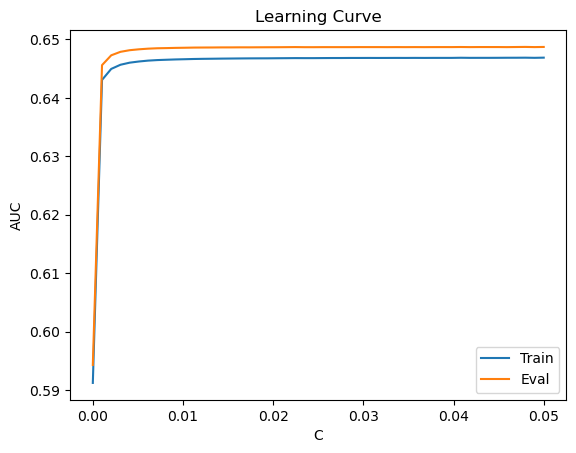

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

param_values = [float(x) for x in np.linspace(0.000001, 0.05, 50)]
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Eval')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

draw_learning_curve(param_values)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [0.01, 0.02, 0.03]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
lr_tuned = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', cv=5)
lr_tuned.fit(Xtrain_under1, ytrain_under1)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.02, 0.03],
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

In [ ]:
eval_classification(lr_tuned)

Accuracy (Train Set): 0.61
Accuracy (Eval Set): 0.61
Precision (Train Set): 0.61
Precision (Eval Set): 0.12
Recall (Train Set): 0.60
Recall (Eval Set): 0.61
F1-Score (Train Set): 0.60
F1-Score (Eval Set): 0.20
AUC (Train-proba): 0.65
AUC (Eval-proba): 0.65
roc_auc (Crossval  Train): 0.6468580545528175
roc_auc (Crossval  Eval): 0.6463052153111534


### **Model Evaluation**

ROC_AUC scores for cross-validation on train and test sets:<br>

Before hyperparameter tuning: below 0.7, indicating that the model is **underfitting**.<br>
After hyperparameter tuning: still below 0.7, indicating that the model is **underfitting**.

## **Decision Tree**

### **Modelling**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(Xtrain_under1, ytrain_under1)

DecisionTreeClassifier()

In [ ]:
eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Eval Set): 0.75
Precision (Train Set): 1.00
Precision (Eval Set): 0.21
Recall (Train Set): 1.00
Recall (Eval Set): 0.83
F1-Score (Train Set): 1.00
F1-Score (Eval Set): 0.34
AUC (Train-proba): 1.00
AUC (Eval-proba): 0.79
roc_auc (Crossval  Train): 1.0
roc_auc (Crossval  Eval): 0.7625827844645694


### **Tuning Hyperparameter**

param value: 1; train: 0.5506039731244088; test: 0.5521553940628156
param value: 3; train: 0.6000527900774999; test: 0.6004301523206228
param value: 5; train: 0.6213672915231547; test: 0.6169086815977513
param value: 7; train: 0.6435940895933766; test: 0.6360668947404045
param value: 9; train: 0.6717043219801629; test: 0.6521097567869751
param value: 11; train: 0.7111528166139564; test: 0.6720513710152369
param value: 13; train: 0.7619675545146625; test: 0.6997421769080915
param value: 15; train: 0.8175727063886344; test: 0.725168550638226
param value: 17; train: 0.8714666874025895; test: 0.7498557189179476
param value: 19; train: 0.9171355920638901; test: 0.7692136464560586
param value: 21; train: 0.9510352861607044; test: 0.7829963599016653
param value: 23; train: 0.9738756347249543; test: 0.7898637576487185
param value: 25; train: 0.9867139129789341; test: 0.7931059051256412
param value: 27; train: 0.9939293956228725; test: 0.7941020207313072
param value: 29; train: 0.99744817881753

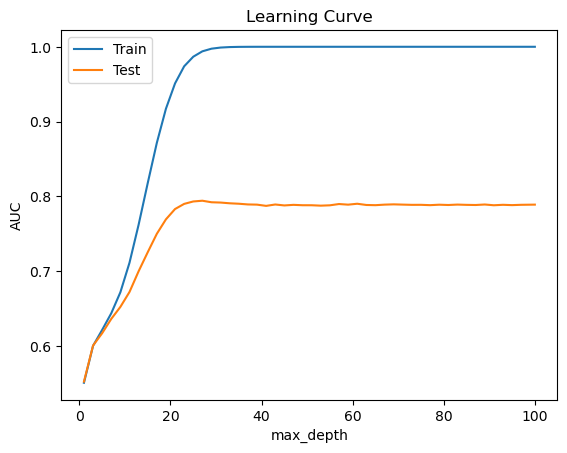

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 50)]
draw_learning_curve(param_values)

param value: 2; train: 1.0; test: 0.7889764170180007
param value: 6; train: 0.9973262885123795; test: 0.8005122825618154
param value: 10; train: 0.9890130326782665; test: 0.8052053462970367
param value: 14; train: 0.9782842968247314; test: 0.8038400750371721
param value: 18; train: 0.9664453148858324; test: 0.8006547192951465
param value: 22; train: 0.9546977729228276; test: 0.7958298294182578
param value: 26; train: 0.9425191235669286; test: 0.790542110664608
param value: 30; train: 0.931657141497514; test: 0.7854372289394214
param value: 34; train: 0.9208108967890941; test: 0.7804412814049206
param value: 38; train: 0.9107823169984405; test: 0.7747020490654037
param value: 42; train: 0.901630321806097; test: 0.7694939019680124
param value: 46; train: 0.89341605449186; test: 0.7659804378055537
param value: 50; train: 0.8859140029661683; test: 0.7623007606929311
param value: 54; train: 0.8784216192249434; test: 0.7582248397027025
param value: 58; train: 0.8720507923974022; test: 0.7552

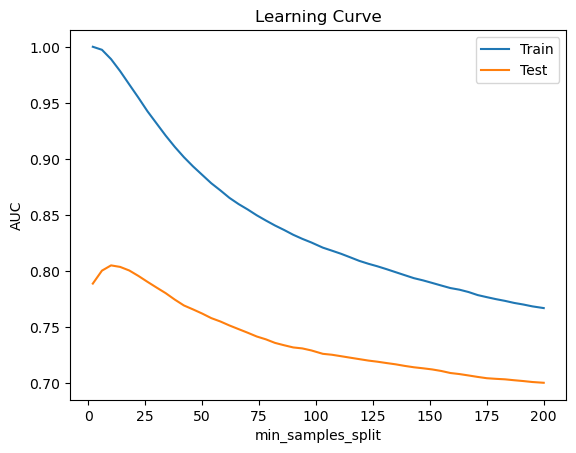

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_split=i)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_split')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(2, 200, 50)]
draw_learning_curve(param_values)

param value: 1; train: 1.0; test: 0.7881184628639265
param value: 5; train: 0.9667284619914182; test: 0.8001424727863184
param value: 9; train: 0.9250724269998418; test: 0.7821825744477935
param value: 13; train: 0.8932855713196028; test: 0.7678549107229015
param value: 17; train: 0.8671617257791666; test: 0.7527984286785759
param value: 21; train: 0.8460398956970315; test: 0.7413119136288637
param value: 25; train: 0.8280590327104292; test: 0.732020672952067
param value: 29; train: 0.8144702423832001; test: 0.7235672374582655
param value: 33; train: 0.802930833796418; test: 0.7162065882584012
param value: 37; train: 0.7913537883929163; test: 0.710637624480954
param value: 41; train: 0.7817736757341743; test: 0.7051204928083183
param value: 45; train: 0.7743578829443919; test: 0.7013808112146624
param value: 49; train: 0.7677290566060542; test: 0.6979103219336511
param value: 53; train: 0.7611719399646658; test: 0.6951153681684787
param value: 57; train: 0.7557706930908759; test: 0.693

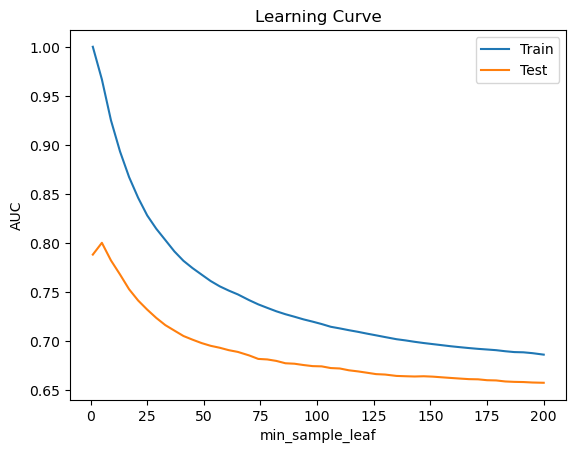

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_sample_leaf')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 200, 50)]
draw_learning_curve(param_values)

### **Model Evaluation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(14, 17, num = 4)] # Maximum number of levels in tree
min_samples_split = [int(x) for x in np.linspace(25, 30, num = 6)] # Minimum number of samples required to split a node
min_samples_leaf = [int(x) for x in np.linspace(13, 29, num = 17)] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=123)
dt_tuned = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
dt_tuned.fit(Xtrain_under1, ytrain_under1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [14, 15, 16, 17],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [13, 14, 15, 16, 17, 18, 19, 20,
                                              21, 22, 23, 24, 25, 26, 27, 28,
                                              29],
                         'min_samples_split': [25, 26, 27, 28, 29, 30],
                         'splitter': ['best', 'random']},
             scoring='precision')

In [ ]:
eval_classification(dt_tuned)

Accuracy (Train Set): 0.67
Accuracy (Eval Set): 0.64
Precision (Train Set): 0.67
Precision (Eval Set): 0.13
Recall (Train Set): 0.65
Recall (Eval Set): 0.61
F1-Score (Train Set): 0.66
F1-Score (Eval Set): 0.21
AUC (Train-proba): 0.73
AUC (Eval-proba): 0.68
roc_auc (Crossval  Train): 0.7411001949336617
roc_auc (Crossval  Eval): 0.6703628846323475


## **Random Forest**

### **Modelling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123)
rf.fit(Xtrain_under1, ytrain_under1)

RandomForestClassifier(random_state=123)

In [ ]:
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Eval Set): 0.83
Precision (Train Set): 1.00
Precision (Eval Set): 0.30
Recall (Train Set): 1.00
Recall (Eval Set): 0.88
F1-Score (Train Set): 1.00
F1-Score (Eval Set): 0.45
AUC (Train-proba): 1.00
AUC (Eval-proba): 0.93
roc_auc (Crossval  Train): 1.0
roc_auc (Crossval  Eval): 0.917358300596485


### **Tuning Hyperparameter**

param value: 10; train: 0.7184657029071277; test: 0.6915803874356001
param value: 11; train: 0.7455235975136376; test: 0.7081452425679358
param value: 12; train: 0.7762333876072861; test: 0.7285925936159597
param value: 13; train: 0.8097183548134428; test: 0.7477165416563818
param value: 14; train: 0.8420428431834132; test: 0.7695876965975628
param value: 15; train: 0.8725165232935661; test: 0.7881996414419289


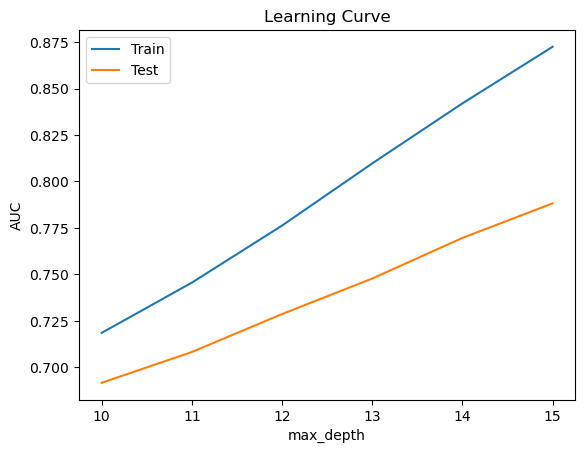

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(max_depth=i)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(10, 15, 6)]
draw_learning_curve(param_values)

param value: 2; train: 1.0; test: 0.9345927428007069
param value: 6; train: 0.9999347522361854; test: 0.9214985668909647
param value: 10; train: 0.9985727934651785; test: 0.902210509523349
param value: 14; train: 0.9942403462134343; test: 0.8852593919235817
param value: 18; train: 0.9882730965828748; test: 0.8759882154225148
param value: 22; train: 0.9800751618938082; test: 0.8625304668841136
param value: 26; train: 0.9709740324444738; test: 0.8526510962408764
param value: 30; train: 0.9616778555023575; test: 0.8422134858919751
param value: 34; train: 0.9526924495566444; test: 0.8351726038439389
param value: 38; train: 0.9439640996272742; test: 0.8271138246592906
param value: 42; train: 0.9352692998282252; test: 0.8209306085609009
param value: 46; train: 0.9277755297848369; test: 0.8164725100443613
param value: 50; train: 0.9198767987427955; test: 0.8104880400783027
param value: 54; train: 0.9133017134925963; test: 0.8082158961277452
param value: 58; train: 0.9051545383491743; test: 0.

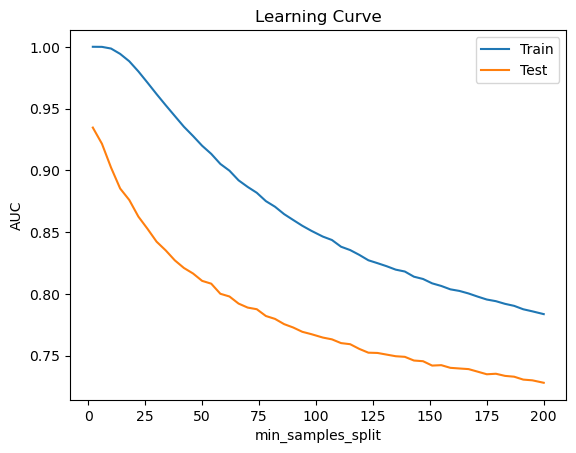

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(min_samples_split=i)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_split')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(2, 200, 50)]
draw_learning_curve(param_values)

param value: 1; train: 1.0; test: 0.9350283563607966
param value: 5; train: 0.9709756461443186; test: 0.8477036055572587
param value: 9; train: 0.9189655113609119; test: 0.8082312116641698
param value: 13; train: 0.8780588901382609; test: 0.7811945279675417
param value: 17; train: 0.8465590468093795; test: 0.7609727640718736
param value: 21; train: 0.8245596493620481; test: 0.7503477188911658
param value: 25; train: 0.8047865927361525; test: 0.7377682501515215
param value: 29; train: 0.7899641152721171; test: 0.7296596403315767
param value: 34; train: 0.7781224867095601; test: 0.7237152593120804
param value: 38; train: 0.7662062327293336; test: 0.7161421285299705
param value: 42; train: 0.7582913224746585; test: 0.7116900019004653
param value: 46; train: 0.7502436293305563; test: 0.7070933725238895
param value: 50; train: 0.7461455372317551; test: 0.7051500059791893
param value: 54; train: 0.741151940194464; test: 0.7025967099804409
param value: 58; train: 0.7356461033310748; test: 0.6

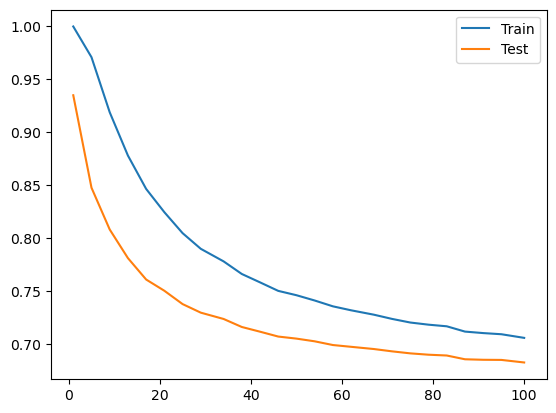

In [ ]:
param_values = [int(x) for x in np.linspace(1, 100, 25)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
    model.fit(Xtrain_under1, ytrain_under1)

    # eval on train
    y_pred_train_proba = model.predict_proba(Xtrain_under1)
    train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(Xeval1)
    test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

### **Model Evaluation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(100, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(12, 14)]
min_samples_split = [int(x) for x in np.linspace(80, 110, 40)]
min_samples_leaf = [int(x) for x in np.linspace(13, 21, 9)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=123)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=123, cv=5)
rf_tuned.fit(Xtrain_under1, ytrain_under1)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [12, 12, 12, 12, 12, 12,
                                                      12, 12, 12, 12, 12, 12,
                                                      12, 12, 12, 12, 12, 12,
                                                      12, 12, 12, 12, 12, 12,
                                                      12, 13, 13, 13, 13, 13, ...],
                                        'min_samples_leaf': [13, 14, 15, 16, 17,
                                                             18, 19, 20, 21],
                                        'min_samples_split': [80, 80, 81, 82,
                                                              83, 83, 84, 85,
                                                              86, 86, 87, 88,
                                                              89, 90, 90, 91,
                                                              92, 93, 93, 94,
                                                              95, 96, 96, 97,
                                                              98, 99, 100, 100,
                                                              101, 102, ...],
                                        'n_estimators': [100, 102, 104, 106,
                                                         108, 110, 112, 114,
                                                         116, 118, 120, 122,
                                                         124, 126, 128, 130,
                                                         132, 134, 136, 138,
                                                         140, 142, 144, 146,
                                                         148, 151, 153, 155,
                                                         157, 159, ...]},
                   random_state=123, scoring='roc_auc')

In [ ]:
eval_classification(rf_tuned)

Accuracy (Train Set): 0.67
Accuracy (Eval Set): 0.65
Precision (Train Set): 0.67
Precision (Eval Set): 0.13
Recall (Train Set): 0.67
Recall (Eval Set): 0.65
F1-Score (Train Set): 0.67
F1-Score (Eval Set): 0.22
AUC (Train-proba): 0.74
AUC (Eval-proba): 0.70
roc_auc (Crossval  Train): 0.7348915725391942
roc_auc (Crossval  Eval): 0.696778168787082


## **XGBoost**

### **Modelling**

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(Xtrain_under1, ytrain_under1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
eval_classification(xg)

Accuracy (Train Set): 0.71
Accuracy (Eval Set): 0.67
Precision (Train Set): 0.71
Precision (Eval Set): 0.15
Recall (Train Set): 0.71
Recall (Eval Set): 0.69
F1-Score (Train Set): 0.71
F1-Score (Eval Set): 0.25
AUC (Train-proba): 0.78
AUC (Eval-proba): 0.74
roc_auc (Crossval  Train): 0.790158284402261
roc_auc (Crossval  Eval): 0.7411078081957198


### **Tuning Hyperparameter**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the hyperparameters dictionary
hyperparameters = {
    'max_depth': [1],  # Narrowing down the range
    'min_child_weight': [1],  # Narrowing down the range
    'gamma': [0, 0.01, 0.02, 0.05],  # Narrowing down the range
    'tree_method': ['auto'],  # Limiting the options
    'colsample_bytree': [0, 0.01, 0.02, 0.05],  # Narrowing down the range
    'eta': [0, 0.01, 0.02, 0.05],  # Narrowing down the range
    'lambda': [0, 0.01, 0.02, 0.05],  # Narrowing down the range
    'alpha': [0, 0.01, 0.02, 0.05]  # Narrowing down the range
}

# Initialize the XGBoost classifier
xg = XGBClassifier(random_state=123)

# Perform RandomizedSearchCV with more conservative hyperparameters
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=123, scoring='recall', n_iter=20)
xg_tuned.fit(Xtrain_under1, ytrain_under1)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=123, ...),
                   n_iter=20,
                   param_distributions={'alpha': [0, 0.01, 0.02, 0.05],
                                        'colsample_bytree': [0, 0.01, 0.02,
                                                             0.05],
                                        'eta': [0, 0.01, 0.02, 0.05],
                                        'gamma': [0, 0.01, 0.02, 0.05],
                                        'lambda': [0, 0.01, 0.02, 0.05],
                                        'max_depth': [1],
                                        'min_child_weight': [1],
                                        'tree_method': ['auto']},
                   random_state=123, scoring='recall')

In [ ]:
eval_classification(xg_tuned)

Accuracy (Train Set): 0.60
Accuracy (Eval Set): 0.58
Precision (Train Set): 0.59
Precision (Eval Set): 0.11
Recall (Train Set): 0.61
Recall (Eval Set): 0.62
F1-Score (Train Set): 0.60
F1-Score (Eval Set): 0.19
AUC (Train-proba): 0.63
AUC (Eval-proba): 0.63
roc_auc (Crossval  Train): 0.6329243089532055
roc_auc (Crossval  Eval): 0.6317533526059765


### **Model Evaluation**

ROC_AUC scores for cross-validation on train and test sets:<br>

Before hyperparameter tuning: above 0.7 and not significantly different, indicating that the model is **adequately fit**.<br>
After hyperparameter tuning: under 0.7, indicating that the model is **underfitting**.

# **G. Confusion Metrics**

In [ ]:
Xtest1 = Xtest1[['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_INCOME_TYPE_Working', 'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_3', 'CREDIT_ACTIVE_Active', 'CODE_GENDER_M', 'REG_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE_Cash loans', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'CREDIT_TYPE_Microloan', 'NAME_HOUSING_TYPE_With parents', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_CREDIT_ENDDATE', 'TOTAL_FLAG_DOCUMENT', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_WORK_PHONE', 'FLAG_OWN_CAR_N', 'CREDIT_TYPE_Credit card', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_FAMILY_STATUS_Single / not married', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS_Civil marriage', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE']]

In [ ]:
from sklearn.metrics import confusion_matrix


def confusion(model):
    y_pred_proba = model.predict_proba(Xtest1)
    y_predict = model.predict(Xtest1)
    print('Accuracy: %.2f%%' % (accuracy_score(ytest1, y_predict) * 100))
    print('Precision: %.2f%%' % (precision_score(ytest1, y_predict) * 100))
    print('Recall: %.2f%%' % (recall_score(ytest1, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(ytest1, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(ytest1, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(ytest1, y_predict)

    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model.__class__.__name__}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])
    plt.show()

Accuracy: 85.68%
Precision: 15.22%
Recall: 18.21%
F1_Score: 16.58%
ROC_AUC: 62.53%


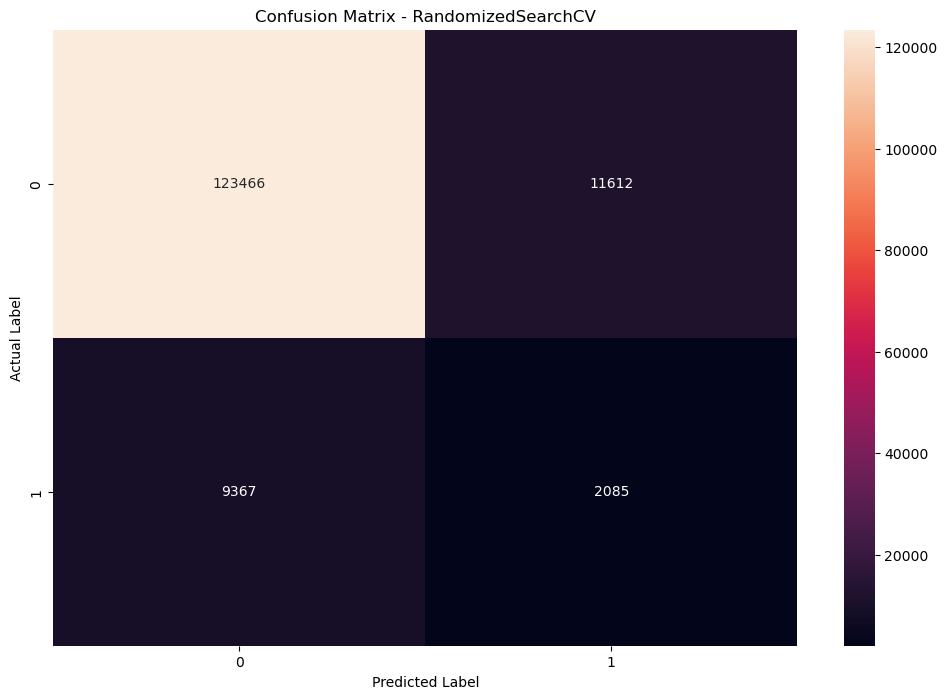

In [ ]:
confusion(rf_tuned)

Accuracy: 89.26%
Precision: 11.28%
Recall: 5.46%
F1_Score: 7.36%
ROC_AUC: 54.62%


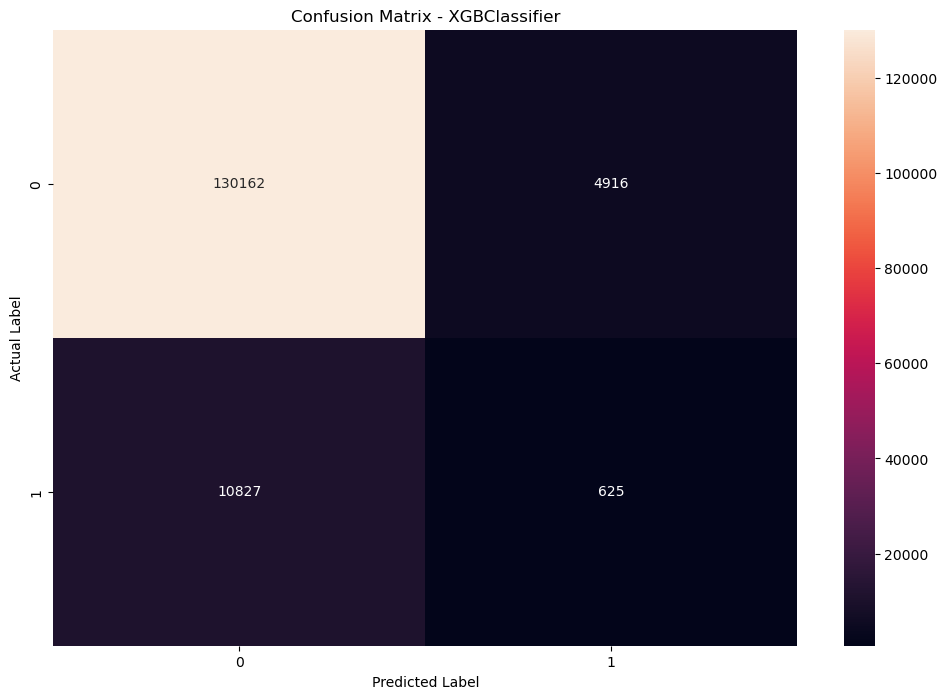

In [ ]:
confusion(xg)

# **H. Test to Application Test**

In [ ]:
df_app_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'WEEKDAY_APPR_PROCESS_START_FRIDAY',
       'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'WEEKDAY_APPR_PROCESS_START_SATURDAY',
       'WEEKDAY_APPR_PROCESS_START_SUNDAY',
       'WEEKDAY_APPR_PROCESS_START_THURSDAY',
       'WEEKDAY_APPR_PROCESS_START_TUESDAY',
       'WEEKDAY_APPR_PROCESS_START_WEDNESDAY'],
      dtype='object', length=211)

In [ ]:
df_join_test =  pd.merge(df_app_test, df_bureau, on='SK_ID_CURR')

In [ ]:
cat_for_test = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

# Doing one-hot encoding on categorical columns
for cat_test in cat_for_test:
    if df_join_test[cat_test].dtype == 'object':
        nominal_encoded = pd.get_dummies(df_join_test[cat_test], prefix=cat_test, dtype=int)
        df_join_test = pd.concat([df_join_test, nominal_encoded], axis=1)

# Deleting the categorical columns that have been encoded
df_join_test.drop(columns=cat_test, inplace=True)

In [ ]:
df_join_test['TOTAL_FLAG_DOCUMENT'] = df_join_test['TOTAL_FLAG_DOCUMENT'] = df_join_test['FLAG_DOCUMENT_2'] + df_join_test['FLAG_DOCUMENT_3'] + df_join_test['FLAG_DOCUMENT_4'] + df_join_test['FLAG_DOCUMENT_5'] + df_join_test['FLAG_DOCUMENT_6'] + df_join_test['FLAG_DOCUMENT_7'] + df_join_test['FLAG_DOCUMENT_8'] + df_join_test['FLAG_DOCUMENT_9'] + df_join_test['FLAG_DOCUMENT_10'] + df_join_test['FLAG_DOCUMENT_11'] + df_join_test['FLAG_DOCUMENT_12'] + df_join_test['FLAG_DOCUMENT_13'] + df_join_test['FLAG_DOCUMENT_14'] + df_join_test['FLAG_DOCUMENT_15'] + df_join_test['FLAG_DOCUMENT_16'] + df_join_test['FLAG_DOCUMENT_17'] + df_join_test['FLAG_DOCUMENT_18'] + df_join_test['FLAG_DOCUMENT_19'] + df_join_test['FLAG_DOCUMENT_20'] + df_join_test['FLAG_DOCUMENT_21']

In [ ]:
df_join_test = df_join_test[['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_INCOME_TYPE_Working', 'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_3', 'CREDIT_ACTIVE_Active', 'CODE_GENDER_M', 'REG_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE_Cash loans', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'CREDIT_TYPE_Microloan', 'NAME_HOUSING_TYPE_With parents', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_CREDIT_ENDDATE', 'TOTAL_FLAG_DOCUMENT', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_WORK_PHONE', 'FLAG_OWN_CAR_N', 'CREDIT_TYPE_Credit card', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_FAMILY_STATUS_Single / not married', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS_Civil marriage', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE']]

# Display the selected columns
df_join_test.head()

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Working,DAYS_ID_PUBLISH,...,NAME_HOUSING_TYPE_Rented apartment,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Single / not married,CNT_CHILDREN,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Civil marriage,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE
0,-19241,2,2,0,0,0,1,1,1,-812,...,0,0,0,0,0,0,0,0,2.0,0.0
1,-19241,2,2,0,0,0,1,1,1,-812,...,0,0,0,0,0,0,0,0,2.0,0.0
2,-19241,2,2,0,0,0,1,1,1,-812,...,0,0,0,0,0,0,0,0,2.0,0.0
3,-19241,2,2,0,0,0,1,1,1,-812,...,0,0,0,0,0,0,0,0,2.0,0.0
4,-19241,2,2,0,0,0,1,1,1,-812,...,0,0,0,0,0,0,0,0,2.0,0.0


In [ ]:
df_join_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251103 entries, 0 to 251102
Data columns (total 48 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   DAYS_BIRTH                                         251103 non-null  int64  
 1   REGION_RATING_CLIENT_W_CITY                        251103 non-null  int64  
 2   REGION_RATING_CLIENT                               251103 non-null  int64  
 3   NAME_EDUCATION_TYPE_Secondary / secondary special  251103 non-null  int32  
 4   NAME_EDUCATION_TYPE_Secondary / secondary special  251103 non-null  int32  
 5   NAME_EDUCATION_TYPE_Secondary / secondary special  251103 non-null  int32  
 6   NAME_INCOME_TYPE_Working                           251103 non-null  int32  
 7   NAME_INCOME_TYPE_Working                           251103 non-null  int32  
 8   NAME_INCOME_TYPE_Working                           251103 non-null  int32 

In [ ]:
df_join_test = df_join_test.loc[:,~df_join_test.columns.duplicated()]

In [ ]:
df_join_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251103 entries, 0 to 251102
Data columns (total 30 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   DAYS_BIRTH                                         251103 non-null  int64  
 1   REGION_RATING_CLIENT_W_CITY                        251103 non-null  int64  
 2   REGION_RATING_CLIENT                               251103 non-null  int64  
 3   NAME_EDUCATION_TYPE_Secondary / secondary special  251103 non-null  int32  
 4   NAME_INCOME_TYPE_Working                           251103 non-null  int32  
 5   DAYS_ID_PUBLISH                                    251103 non-null  int64  
 6   FLAG_DOCUMENT_3                                    251103 non-null  int64  
 7   CREDIT_ACTIVE_Active                               251103 non-null  int32  
 8   CODE_GENDER_M                                      251103 non-null  int32 

In [ ]:
df_join_test.isnull().sum()

DAYS_BIRTH                                             0
REGION_RATING_CLIENT_W_CITY                            0
REGION_RATING_CLIENT                                   0
NAME_EDUCATION_TYPE_Secondary / secondary special      0
NAME_INCOME_TYPE_Working                               0
DAYS_ID_PUBLISH                                        0
FLAG_DOCUMENT_3                                        0
CREDIT_ACTIVE_Active                                   0
CODE_GENDER_M                                          0
REG_CITY_NOT_WORK_CITY                                 0
NAME_CONTRACT_TYPE_Cash loans                          0
FLAG_EMP_PHONE                                         0
REG_CITY_NOT_LIVE_CITY                                 0
CREDIT_TYPE_Microloan                                  0
NAME_HOUSING_TYPE_With parents                         0
AMT_REQ_CREDIT_BUREAU_YEAR                             0
LIVE_CITY_NOT_WORK_CITY                                0
DEF_30_CNT_SOCIAL_CIRCLE       

In [ ]:
df_join_test.describe()

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Working,DAYS_ID_PUBLISH,FLAG_DOCUMENT_3,CREDIT_ACTIVE_Active,CODE_GENDER_M,REG_CITY_NOT_WORK_CITY,...,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,FLAG_OWN_CAR_N,CREDIT_TYPE_Credit card,NAME_HOUSING_TYPE_Rented apartment,NAME_FAMILY_STATUS_Single / not married,CNT_CHILDREN,NAME_FAMILY_STATUS_Civil marriage,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE
count,251103.000000,251103.000000,251103.000000,251103.000000,251103.000000,251103.000000,251103.000000,251103.000000,251103.000000,251103.000000,...,250998.000000,251103.000000,251103.000000,251103.000000,251103.000000,251103.000000,251103.000000,251103.000000,251103.000000,250998.000000
mean,-16408.665715,2.044607,2.069573,0.670060,0.494606,-3200.931371,0.799779,0.353194,0.301195,0.201077,...,0.106276,0.205975,0.640861,0.232343,0.011338,0.121460,0.403858,0.077669,2.177190,1.492287
std,4145.555581,0.508685,0.512543,0.470192,0.499972,1532.599741,0.400166,0.477963,0.458778,0.400806,...,0.428109,0.404413,0.479749,0.422327,0.105875,0.326662,0.709580,0.267651,0.877711,4.105396
min,-25154.000000,-1.000000,1.000000,0.000000,0.000000,-6348.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-19838.000000,2.000000,2.000000,0.000000,0.000000,-4508.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,-16105.000000,2.000000,2.000000,1.000000,0.000000,-3497.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,-13056.000000,2.000000,2.000000,1.000000,1.000000,-1962.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000
max,-7338.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,21.000000,354.000000


In [ ]:
df_join_test['DEF_30_CNT_SOCIAL_CIRCLE'] = df_join_test['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(round(df_join_test['DEF_30_CNT_SOCIAL_CIRCLE'].mean()))
df_join_test['DEF_60_CNT_SOCIAL_CIRCLE'] = df_join_test['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(round(df_join_test['DEF_60_CNT_SOCIAL_CIRCLE'].mean()))
df_join_test['OBS_30_CNT_SOCIAL_CIRCLE'] = df_join_test['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(round(df_join_test['OBS_30_CNT_SOCIAL_CIRCLE'].mean()))

In [ ]:
predictions = rf_tuned.predict(df_join_test)
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
# Predictions and column name
predictions_series = pd.Series(predictions, name='TARGET')

# Convert the Series to a DataFrame
df_predictions = predictions_series.to_frame()

# Display the resulting DataFrame
print(df_predictions)

        TARGET
0            0
1            0
2            0
3            0
4            0
...        ...
251098       0
251099       0
251100       0
251101       0
251102       0

[251103 rows x 1 columns]


In [ ]:
result = df_predictions.groupby(['TARGET']).size().reset_index(name='COUNT')
result

,TARGET,COUNT
0,0,228620
1,1,22483
